### **Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/aspiring_minds_employability_outcomes_2015.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.shape

(3998, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

### **Deleting and altering unwanted columns**

#### 1. DOL and DOJ to **Experience**

In [ ]:
df['DOL'] = df['DOL'].apply(lambda x:str(x).replace('present','2015'))
df['DOL']= df['DOL'].astype('datetime64[ns]')
df['DOL']=df['DOL'].dt.year

In [ ]:
df['DOJ']= df['DOJ'].dt.year

In [ ]:
df['experience'] = df['DOL'] - df['DOJ']

#### 2. DOB to **age**

In [ ]:
df['DOB'] = df['DOB'].dt.year

In [ ]:
df['Age'] = 2015 - df['DOB']

#### 3. dropping 
- unnamed:0, id, collegeid, collegecityid, DOJ, DOL, DOB

In [ ]:
df.drop(columns=['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID', 'DOJ', 'DOL', 'DOB'], axis=1, inplace=True)

## **Univariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   int64  
 1   Designation            3998 non-null   object 
 2   JobCity                3998 non-null   object 
 3   Gender                 3998 non-null   object 
 4   10percentage           3998 non-null   float64
 5   10board                3998 non-null   object 
 6   12graduation           3998 non-null   int64  
 7   12percentage           3998 non-null   float64
 8   12board                3998 non-null   object 
 9   CollegeTier            3998 non-null   int64  
 10  Degree                 3998 non-null   object 
 11  Specialization         3998 non-null   object 
 12  collegeGPA             3998 non-null   float64
 13  CollegeCityTier        3998 non-null   int64  
 14  CollegeState           3998 non-null   object 
 15  Grad

In [ ]:
df.shape

(3998, 34)

### Numerical Columns
- There are total 26 numerical columns in the data set 

In [ ]:
df.describe(include=['float64', 'int64'])

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,experience,Age
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,1.925713,71.486171,0.300400,2012.105803,501.649075,501.598799,...,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110,1.534267,24.572536
std,2.127375e+05,9.850162,1.653599,10.999933,0.262270,8.167338,0.458489,31.857271,104.940021,86.783297,...,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075,1.161772,1.767473
min,3.500000e+04,43.000000,1995.000000,40.000000,1.000000,6.450000,0.000000,0.000000,180.000000,195.000000,...,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,0.000000,18.000000
25%,1.800000e+05,71.680000,2007.000000,66.000000,2.000000,66.407500,0.000000,2012.000000,425.000000,445.000000,...,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200,1.000000,23.000000
50%,3.000000e+05,79.150000,2008.000000,74.400000,2.000000,71.720000,0.000000,2013.000000,500.000000,505.000000,...,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300,1.000000,24.000000
75%,3.700000e+05,85.670000,2009.000000,82.600000,2.000000,76.327500,1.000000,2014.000000,570.000000,565.000000,...,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,2.000000,26.000000
max,4.000000e+06,97.760000,2013.000000,98.700000,2.000000,99.930000,1.000000,2017.000000,875.000000,795.000000,...,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400,24.000000,38.000000


#### 1. Salary

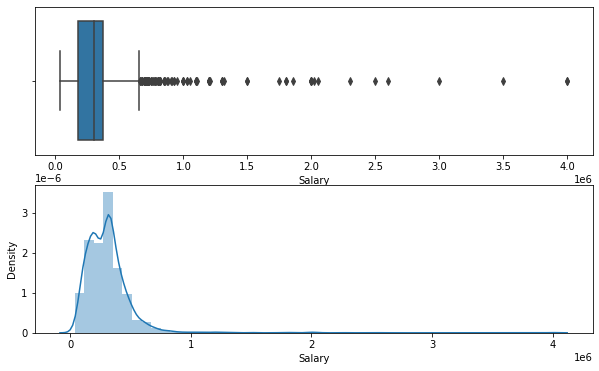

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Salary'])

plt.subplot(2, 1, 2)
sns.distplot(df['Salary'])

plt.show()

In [ ]:
q3 = df['Salary'].quantile(q=0.75)
q1 = df['Salary'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['Salary'] > upper_limit,'Salary'] = df['Salary'].median()
#df.loc[df['Salary'] < lower_limit,'Salary'] = df['Salary'].median()

IQR =  370000.0 - 180000.0
upper_limit = 655000.0
lower_limit = -105000.0


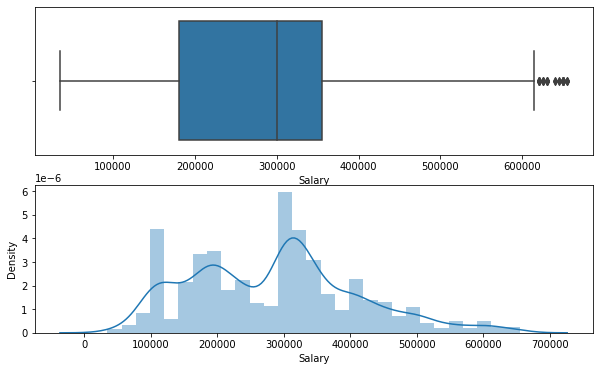

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Salary'])

plt.subplot(2, 1, 2)
sns.distplot(df['Salary'])

plt.show()

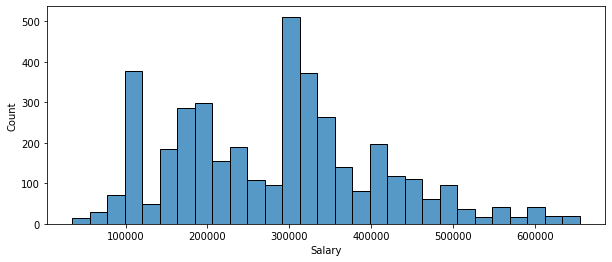

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['Salary'])
plt.show()

#### 2. 10percentage

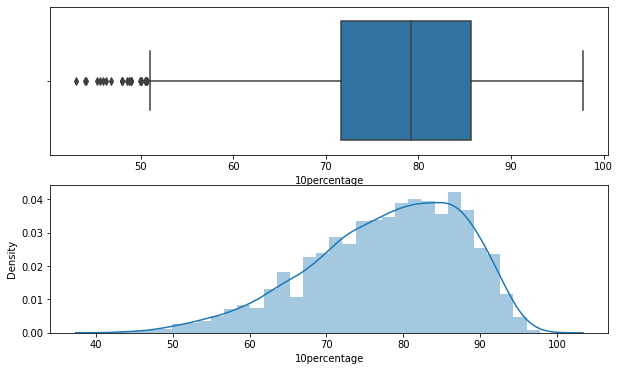

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['10percentage'])

plt.subplot(2, 1, 2)
sns.distplot(df['10percentage'])

plt.show()

In [ ]:
q3 = df['10percentage'].quantile(q=0.75)
q1 = df['10percentage'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['10percentage'] > upper_limit,'10percentage'] = df['10percentage'].median()
df.loc[df['10percentage'] < lower_limit,'10percentage'] = df['10percentage'].median()

IQR =  85.67 - 71.68
upper_limit = 106.655
lower_limit = 50.695000000000014


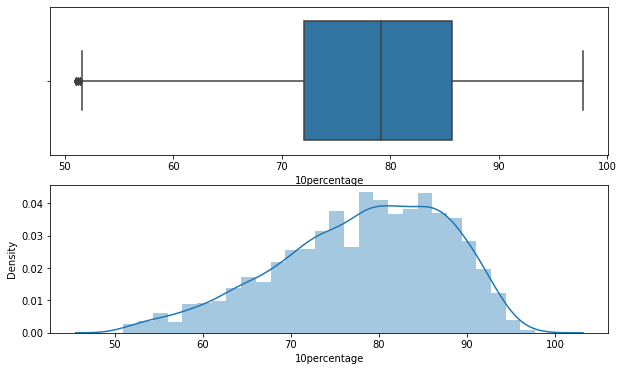

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['10percentage'])

plt.subplot(2, 1, 2)
sns.distplot(df['10percentage'])

plt.show()

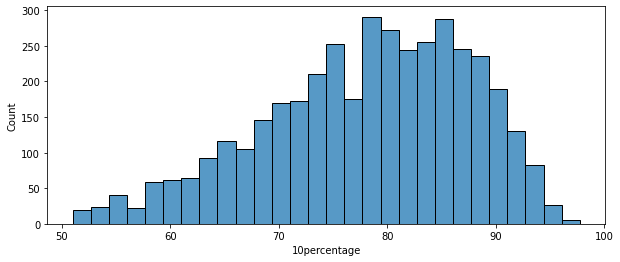

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['10percentage'])
plt.show()

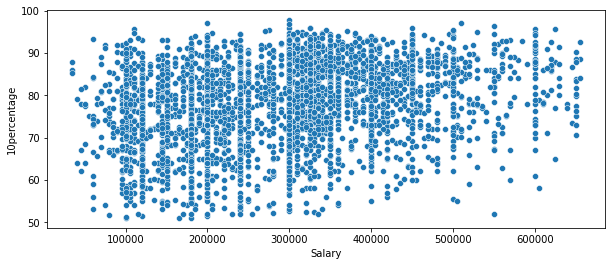

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = df['Salary'], y = df['10percentage'])
plt.show()

<Figure size 720x288 with 0 Axes>

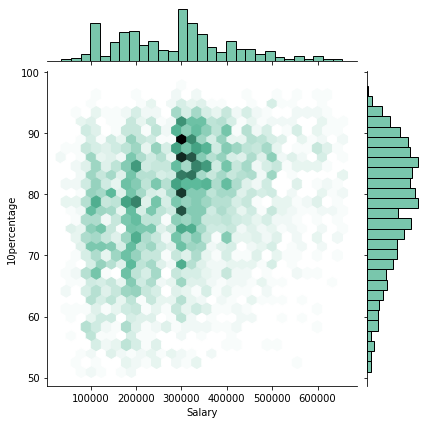

In [ ]:
plt.figure(figsize=(10,4))
sns.jointplot(x = df['Salary'], y = df['10percentage'], kind="hex", color="#4CB391")
plt.show()

- we cannot see any relationship 10th percentage and salary and it looks like this column doesnt effect the salary.
-  we can see that the candidates who have 70-90% score in 10th, have a salary of approximately 3,00,000 

#### 3. 12graduation

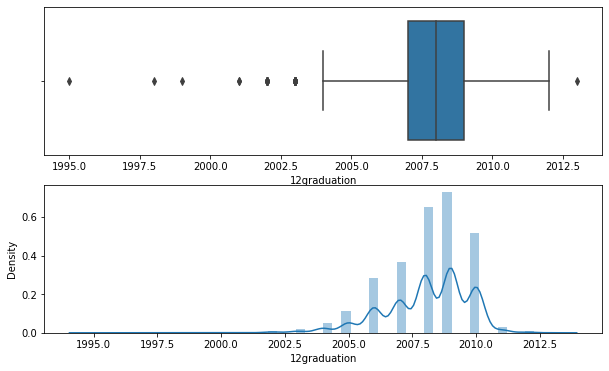

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['12graduation'])

plt.subplot(2, 1, 2)
sns.distplot(df['12graduation'])

plt.show()

In [ ]:
q3 = df['12graduation'].quantile(q=0.75)
q1 = df['12graduation'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['12graduation'] > upper_limit,'12graduation'] = df['12graduation'].median()
df.loc[df['12graduation'] < lower_limit,'12graduation'] = df['12graduation'].median()

IQR =  2009.0 - 2007.0
upper_limit = 2012.0
lower_limit = 2004.0


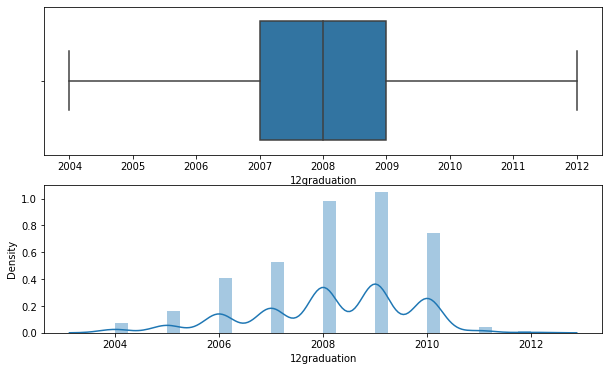

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['12graduation'])

plt.subplot(2, 1, 2)
sns.distplot(df['12graduation'])

plt.show()

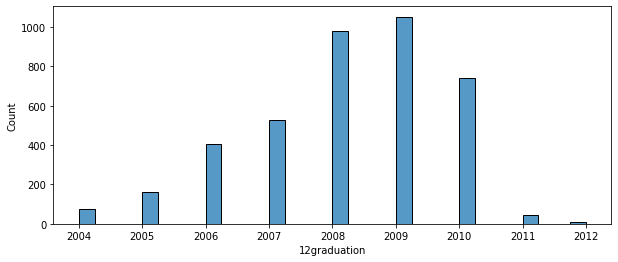

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['12graduation'])
plt.show()

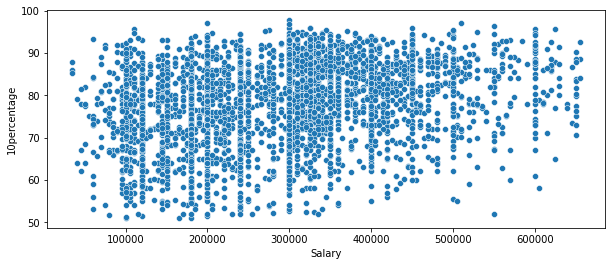

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = df['Salary'], y = df['10percentage'])
plt.show()

<Figure size 720x288 with 0 Axes>

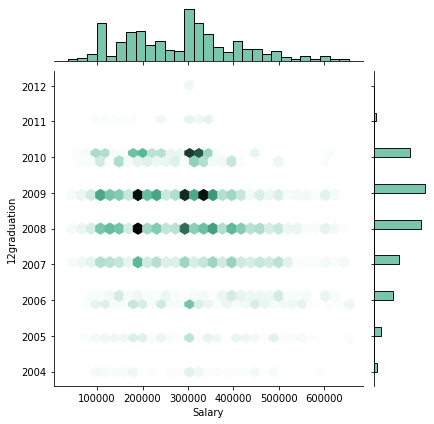

In [ ]:
plt.figure(figsize=(10,4))
sns.jointplot(x = df['Salary'], y = df['12graduation'], kind="hex", color="#4CB391")
plt.show()

- we cannot se any linear relationship 12graduation and salary looks like this column doesnt effect the salary.
- As we can see the there is a high density of in the jointplot where the the students who were graduated in 12th in the year 2008-2010 with the salary of 3,00,000.

#### 4. 12percentage

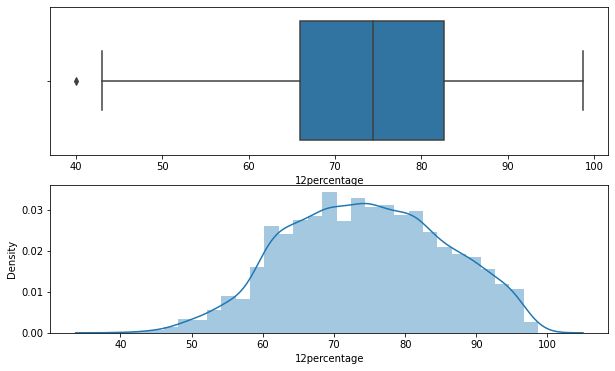

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['12percentage'])

plt.subplot(2, 1, 2)
sns.distplot(df['12percentage'])

plt.show()

In [ ]:
q3 = df['12percentage'].quantile(q=0.75)
q1 = df['12percentage'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['12percentage'] > upper_limit,'12percentage'] = df['12percentage'].median()
df.loc[df['12percentage'] < lower_limit,'12percentage'] = df['12percentage'].median()

IQR =  82.6 - 66.0
upper_limit = 107.49999999999999
lower_limit = 41.10000000000001


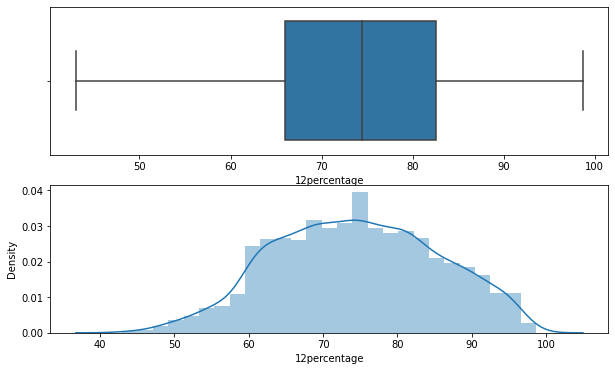

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['12percentage'])

plt.subplot(2, 1, 2)
sns.distplot(df['12percentage'])

plt.show()

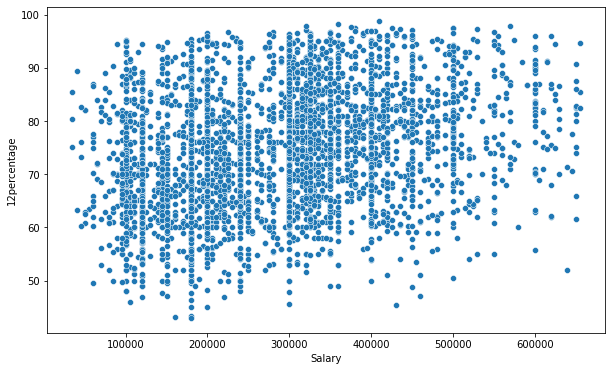

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df['12percentage'], x=df['Salary'])
plt.show()

<Figure size 720x432 with 0 Axes>

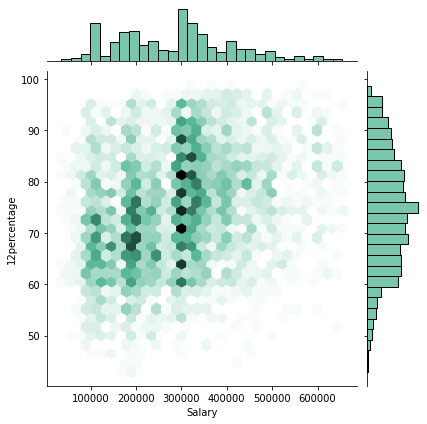

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['12percentage'], kind="hex", color="#4CB391")
plt.show()

- we cannot see any linear relationship 12percentage and salary.
- looks like this column doesnt effect the salary.

#### 5. CollegeTier

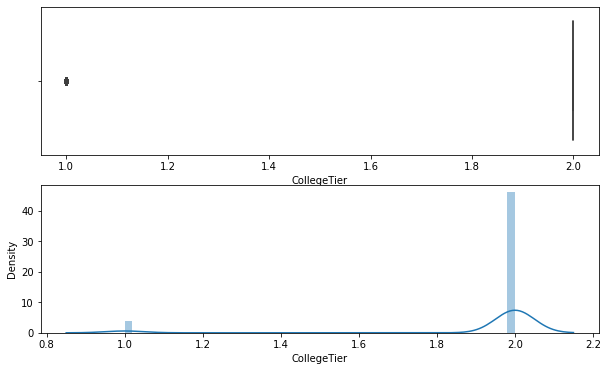

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['CollegeTier'])

plt.subplot(2, 1, 2)
sns.distplot(df['CollegeTier'])

plt.show()

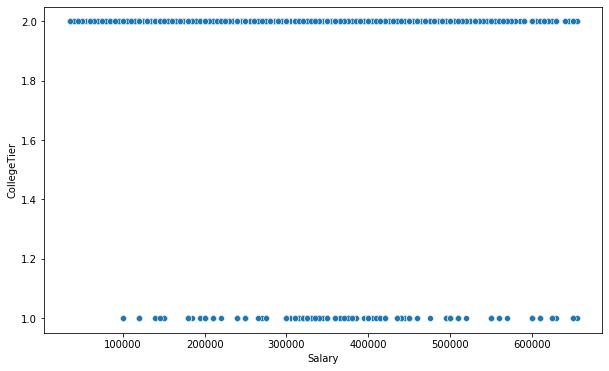

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['CollegeTier'])
plt.show()

<Figure size 720x432 with 0 Axes>

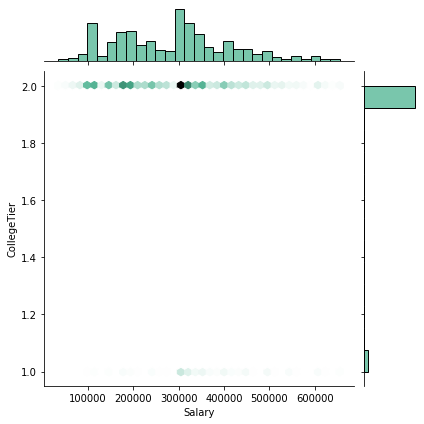

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['CollegeTier'], kind="hex", color="#4CB391")
plt.show()

- there is no effect of collegetier with the salary as we can see that even with tier 1 and tier 2 college have similar salary
- but most of the candidates have studied in tier-2 colleges.

#### 6. collegeGPA

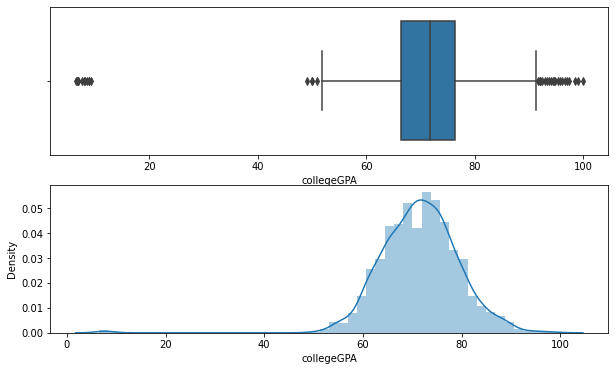

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['collegeGPA'])

plt.subplot(2, 1, 2)
sns.distplot(df['collegeGPA'])

plt.show()

In [ ]:
q3 = df['collegeGPA'].quantile(q=0.75)
q1 = df['collegeGPA'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['collegeGPA'] > upper_limit,'collegeGPA'] = df['collegeGPA'].median()
df.loc[df['collegeGPA'] < lower_limit,'collegeGPA'] = df['collegeGPA'].median()

IQR =  76.3275 - 66.4075
upper_limit = 91.20750000000001
lower_limit = 51.527499999999996


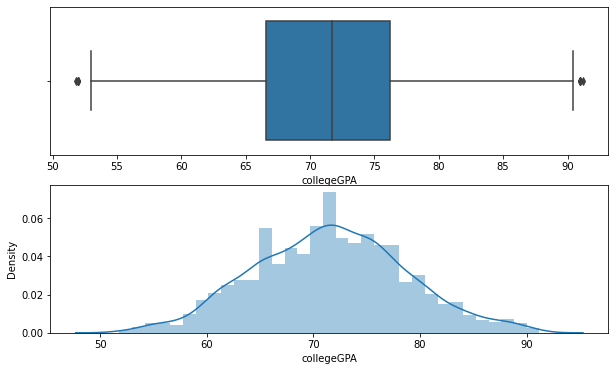

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['collegeGPA'])

plt.subplot(2, 1, 2)
sns.distplot(df['collegeGPA'])

plt.show()

- we cannot see any linear relationship collegeGPA and salary.
- but its a straight line which is not effecting the salary column. 

#### 7. CollegeCityTier

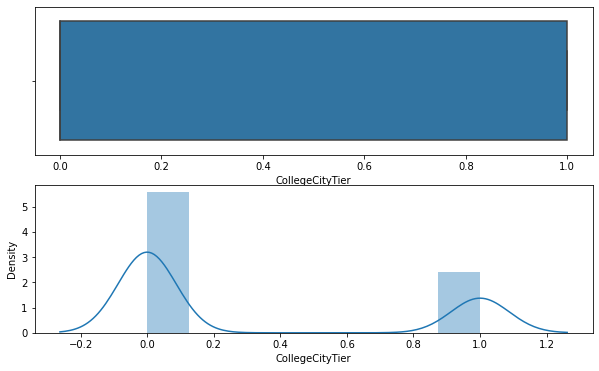

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['CollegeCityTier'])

plt.subplot(2, 1, 2)
sns.distplot(df['CollegeCityTier'])

plt.show()

In [ ]:
q3 = df['CollegeCityTier'].quantile(q=0.75)
q1 = df['CollegeCityTier'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['CollegeCityTier'] > upper_limit,'CollegeCityTier'] = df['CollegeCityTier'].median()
#df.loc[df['CollegeCityTier'] < lower_limit,'CollegeCityTier'] = df['CollegeCityTier'].median()

IQR =  1.0 - 0.0
upper_limit = 2.5
lower_limit = -1.5


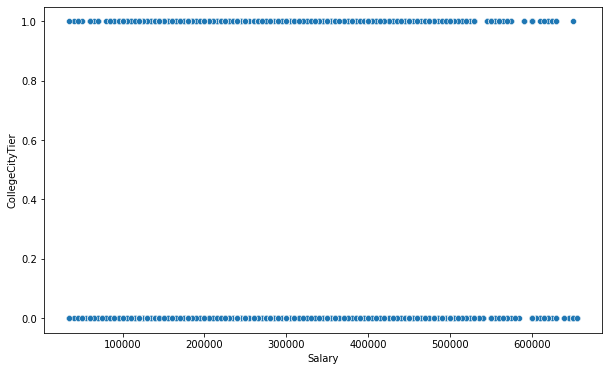

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['CollegeCityTier'])

- there is no relationship between Collegecitytier and salary 
- looks like this column has no effect on Salary Column.

#### 9. English

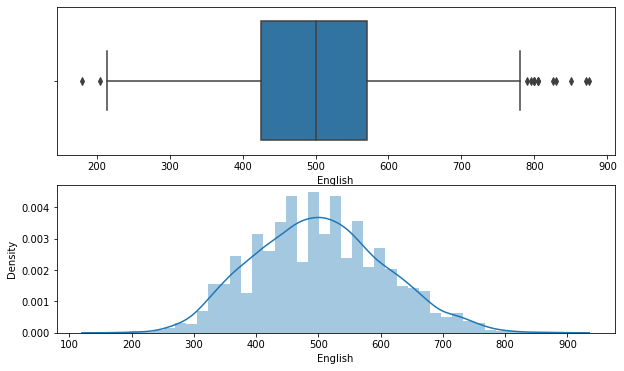

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['English'])

plt.subplot(2, 1, 2)
sns.distplot(df['English'])

plt.show()

In [ ]:
q3 = df['English'].quantile(q=0.75)
q1 = df['English'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['English'] > upper_limit,'English'] = df['English'].median()
df.loc[df['English'] < lower_limit,'English'] = df['English'].median()

IQR =  570.0 - 425.0
upper_limit = 787.5
lower_limit = 207.5


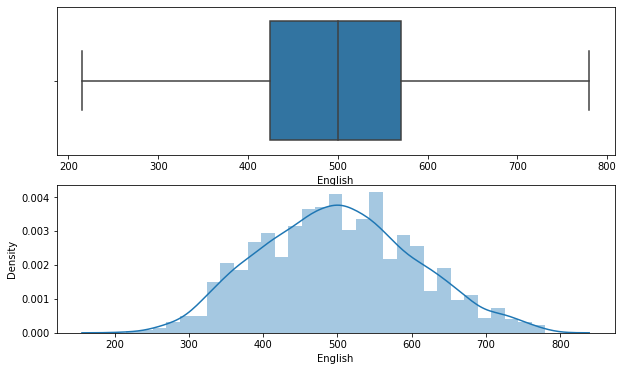

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['English'])

plt.subplot(2, 1, 2)
sns.distplot(df['English'])

plt.show()

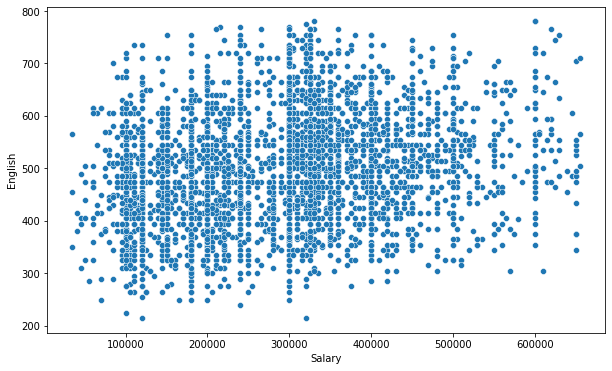

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'],y=df['English'])
plt.show()

<Figure size 720x432 with 0 Axes>

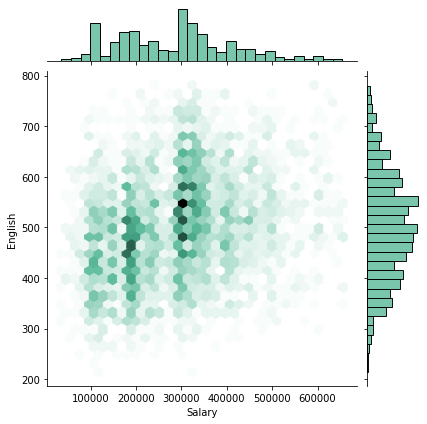

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['English'], kind="hex", color="#4CB391")
plt.show()

- regardless of how much the candidates score in the English section the salary is not varying, and it looks like this column doesn't effect the salary.

#### 10. Logical

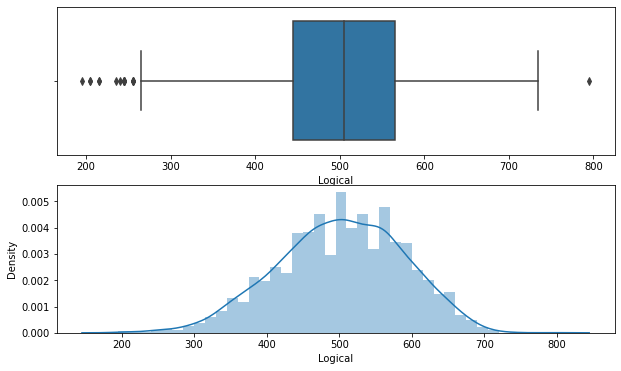

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Logical'])

plt.subplot(2, 1, 2)
sns.distplot(df['Logical'])

plt.show()

In [ ]:
q3 = df['Logical'].quantile(q=0.75)
q1 = df['Logical'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['Logical'] > upper_limit,'Logical'] = df['Logical'].median()
df.loc[df['Logical'] < lower_limit,'Logical'] = df['Logical'].median()

IQR =  565.0 - 445.0
upper_limit = 745.0
lower_limit = 265.0


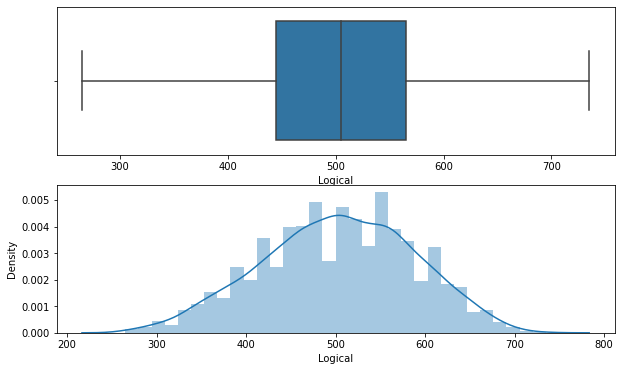

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Logical'])

plt.subplot(2, 1, 2)
sns.distplot(df['Logical'])

plt.show()

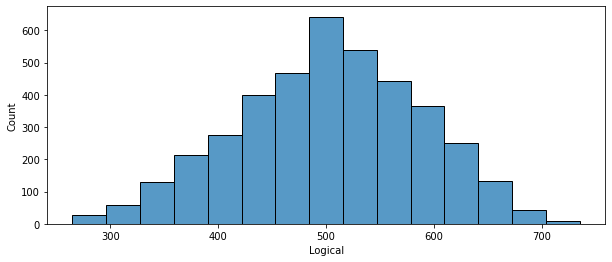

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['Logical'], bins=15)
plt.show()

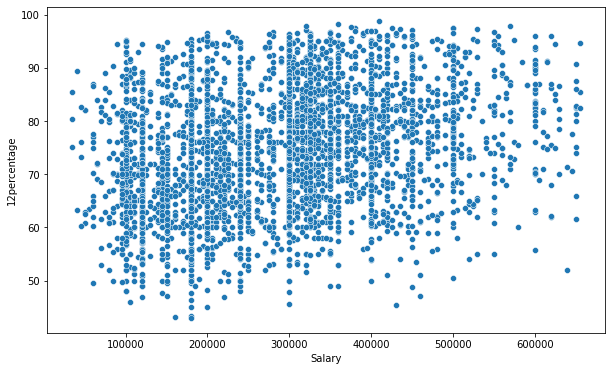

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['12percentage'])
plt.show()

<Figure size 720x432 with 0 Axes>

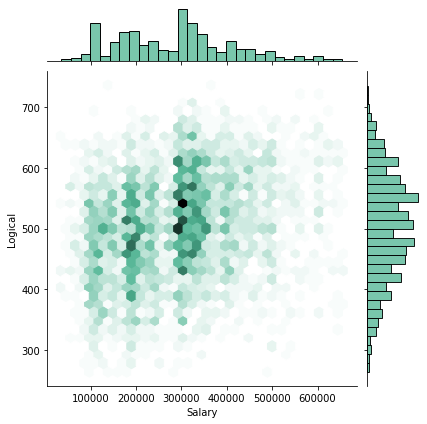

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['Logical'], kind="hex", color="#4CB391")
plt.show()

- we can see the majority of the candidates have between 450-550 in Logical section.
- Regardless of the column the Salary is not effected, so this column doesn't help in salary prediction.

#### 11. Quant

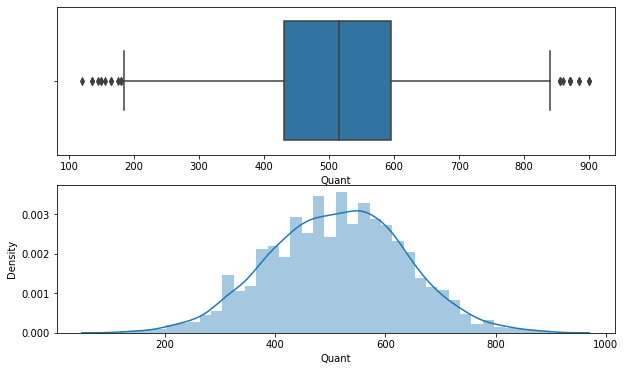

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Quant'])

plt.subplot(2, 1, 2)
sns.distplot(df['Quant'])

plt.show()

In [ ]:
q3 = df['Quant'].quantile(q=0.75)
q1 = df['Quant'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['Quant'] > upper_limit,'Quant'] = df['Quant'].median()
df.loc[df['Quant'] < lower_limit,'Quant'] = df['Quant'].median()

IQR =  595.0 - 430.0
upper_limit = 842.5
lower_limit = 182.5


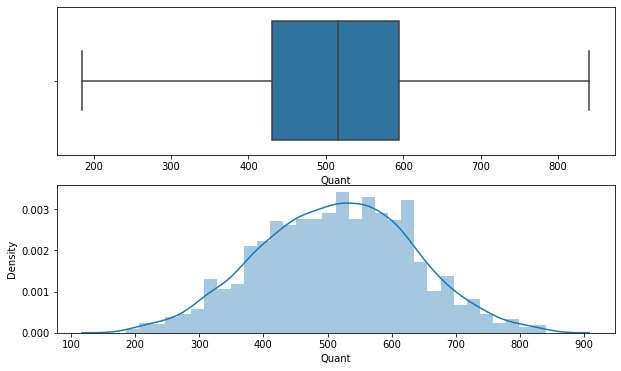

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Quant'])

plt.subplot(2, 1, 2)
sns.distplot(df['Quant'])

plt.show()

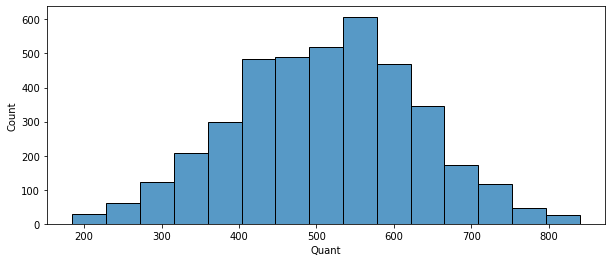

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['Quant'], bins=15)
plt.show()

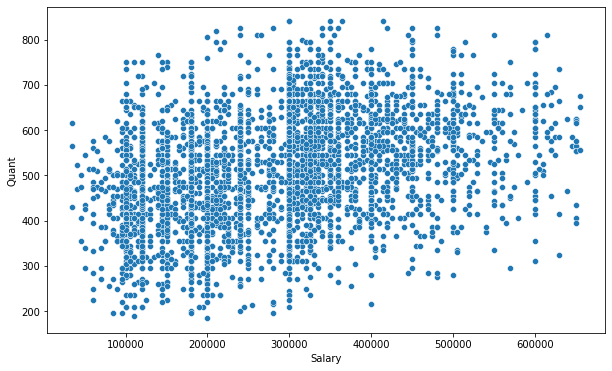

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['Quant'])
plt.show()

<Figure size 720x432 with 0 Axes>

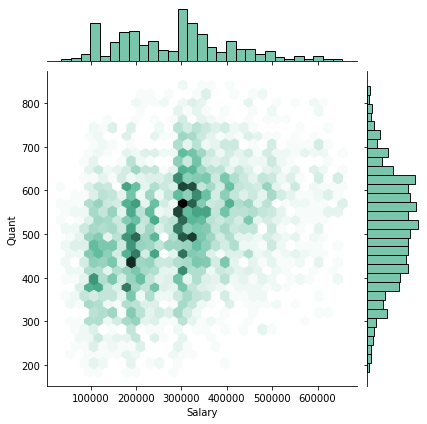

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['Quant'], kind="hex", color="#4CB391")
plt.show()

1. we can see that there is slighty wide spread of salary with respect to the quant section 
2. but we can understand that this Quant column doesnt effect the salary to much.

#### 12. Domain

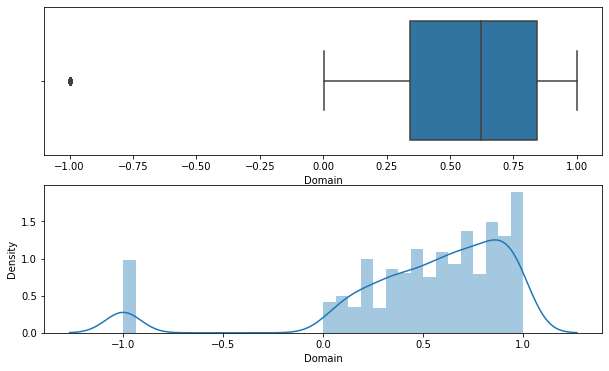

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Domain'])

plt.subplot(2, 1, 2)
sns.distplot(df['Domain'])

plt.show()

In [ ]:
q3 = df['Domain'].quantile(q=0.75)
q1 = df['Domain'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['Domain'] > upper_limit,'Domain'] = df['Domain'].median()
df.loc[df['Domain'] < lower_limit,'Domain'] = df['Domain'].median()

IQR =  0.842248322257836 - 0.342314899911815
upper_limit = 1.5921484557768673
lower_limit = -0.4075852336072164


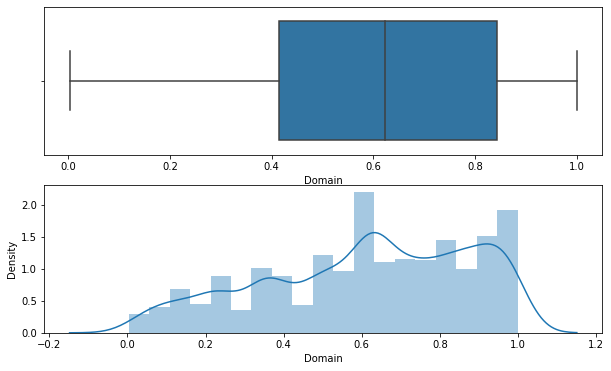

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Domain'])

plt.subplot(2, 1, 2)
sns.distplot(df['Domain'])

plt.show()

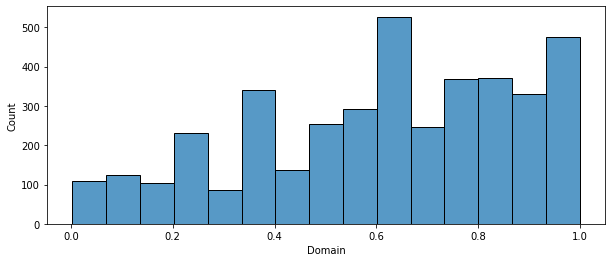

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['Domain'], bins=15)
plt.show()

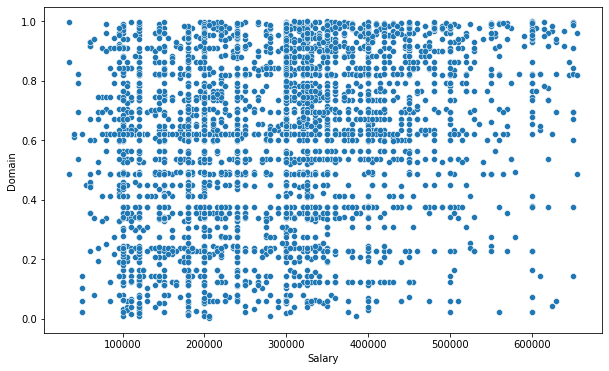

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['Domain'])
plt.show()

<Figure size 720x432 with 0 Axes>

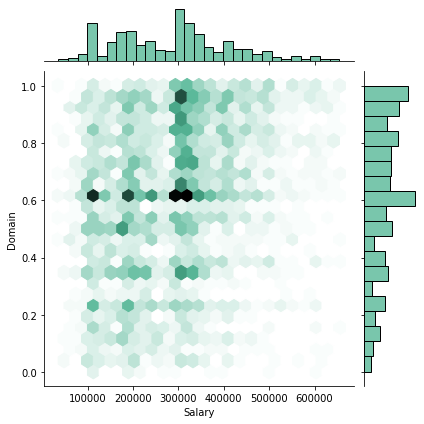

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['Domain'], kind="hex", color="#4CB391")
plt.show()

1. we can see that the most of the candidates have scored between 0.6 to 0.7.
2. there is no effect on salary with respect to Domain Column

#### 13. ComputerProgramming

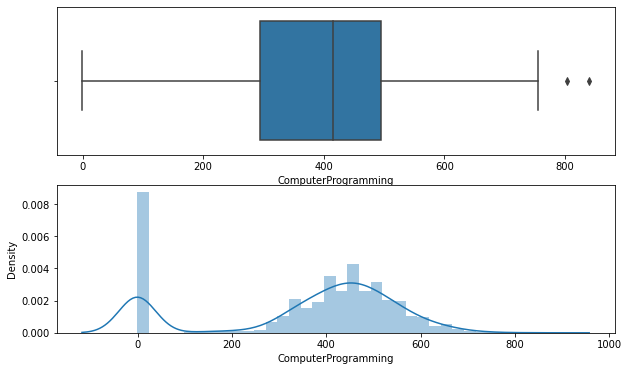

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['ComputerProgramming'])

plt.subplot(2, 1, 2)
sns.distplot(df['ComputerProgramming'])

plt.show()

In [ ]:
q3 = df['ComputerProgramming'].quantile(q=0.75)
q1 = df['ComputerProgramming'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['ComputerProgramming'] > upper_limit,'ComputerProgramming'] = df['ComputerProgramming'].median()
#df.loc[df['ComputerProgramming'] < lower_limit,'ComputerProgramming'] = df['ComputerProgramming'].median()

IQR =  495.0 - 295.0
upper_limit = 795.0
lower_limit = -5.0


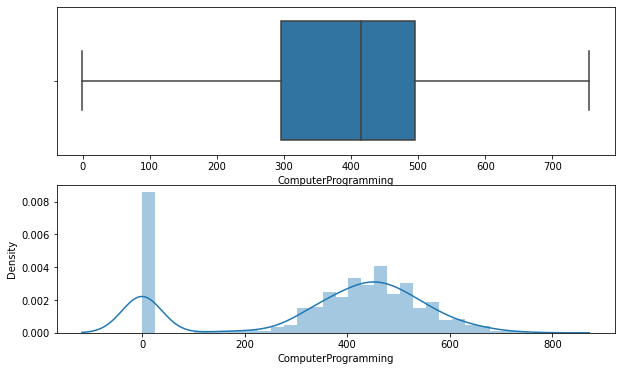

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['ComputerProgramming'])

plt.subplot(2, 1, 2)
sns.distplot(df['ComputerProgramming'])

plt.show()

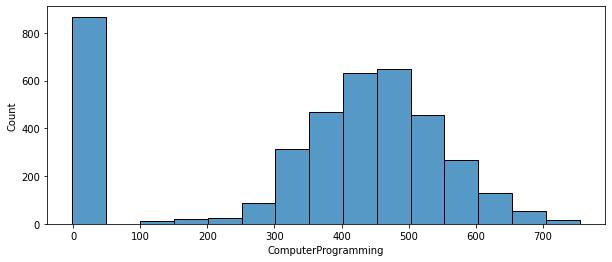

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['ComputerProgramming'], bins=15)
plt.show()

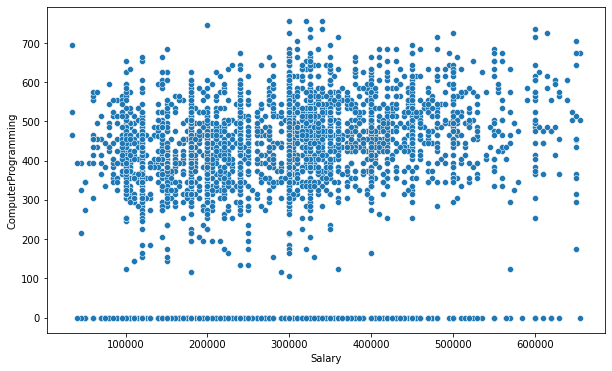

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['ComputerProgramming'])
plt.show()

<Figure size 720x432 with 0 Axes>

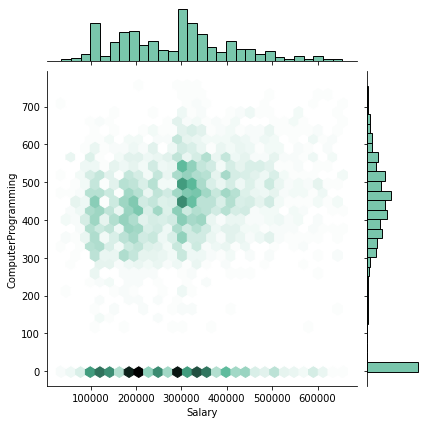

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['ComputerProgramming'], kind="hex", color="#4CB391")
plt.show()

1. we can see that there are candidates who have scored 0 and 350-450 in computerprogramming. 
2. even with good score in computerprogramming salary column didn't get effected.

#### 14. ElectronicsAndSemicon

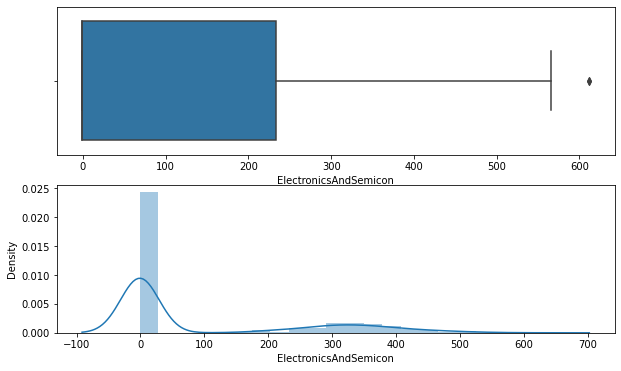

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['ElectronicsAndSemicon'])

plt.subplot(2, 1, 2)
sns.distplot(df['ElectronicsAndSemicon'])

plt.show()

In [ ]:
q3 = df['ElectronicsAndSemicon'].quantile(q=0.75)
q1 = df['ElectronicsAndSemicon'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['ElectronicsAndSemicon'] > upper_limit,'ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].median()
#df.loc[df['ElectronicsAndSemicon'] < lower_limit,'ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].median()

IQR =  233.0 - -1.0
upper_limit = 584.0
lower_limit = -352.0


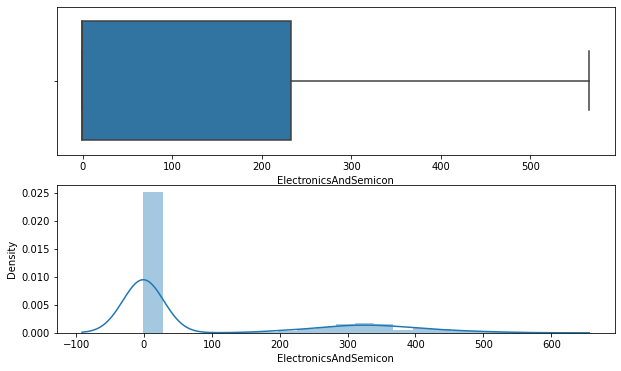

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['ElectronicsAndSemicon'])

plt.subplot(2, 1, 2)
sns.distplot(df['ElectronicsAndSemicon'])

plt.show()

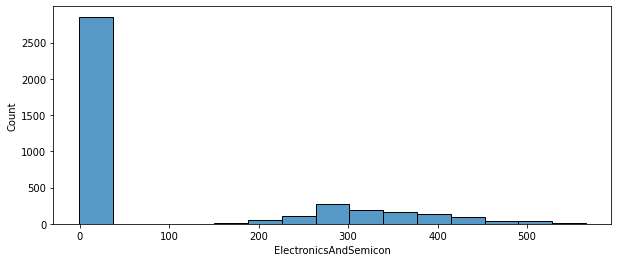

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['ElectronicsAndSemicon'], bins=15)
plt.show()

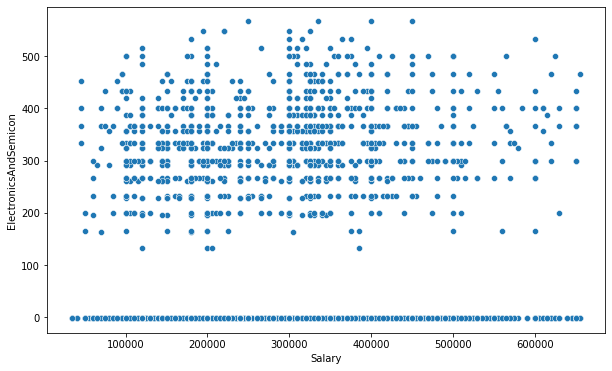

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['ElectronicsAndSemicon'])
plt.show()

<Figure size 720x432 with 0 Axes>

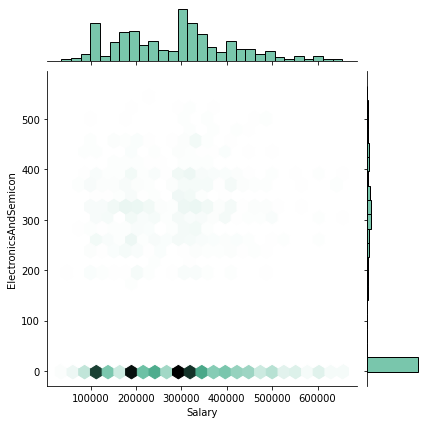

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['ElectronicsAndSemicon'], kind="hex", color="#4CB391")
plt.show()

1. Majority of the candidates have scored 0 in ElectronicsAndSemicon, only few people have score in this section and the salary column is not effected but this ElectronicsAndSemicon column.

#### 15. ComputerScience

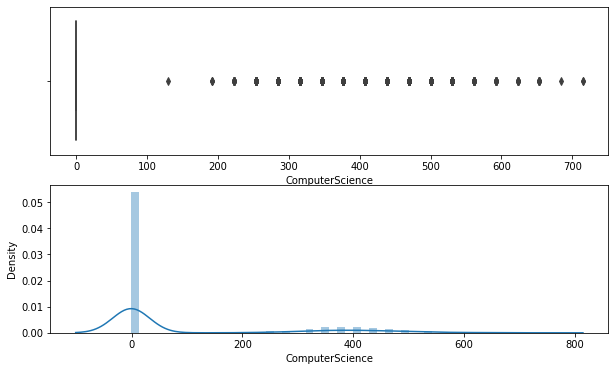

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['ComputerScience'])

plt.subplot(2, 1, 2)
sns.distplot(df['ComputerScience'])

plt.show()

In [ ]:
q3 = df['ComputerScience'].quantile(q=0.75)
q1 = df['ComputerScience'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['ComputerScience'] > upper_limit,'ComputerScience'] = df['ComputerScience'].median()
#df.loc[df['ComputerScience'] < lower_limit,'ComputerScience'] = df['ComputerScience'].median()

IQR =  -1.0 - -1.0
upper_limit = -1.0
lower_limit = -1.0


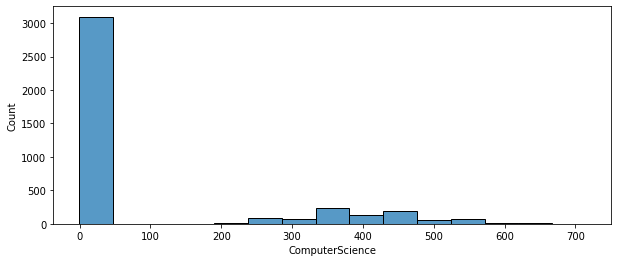

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['ComputerScience'], bins=15)
plt.show()

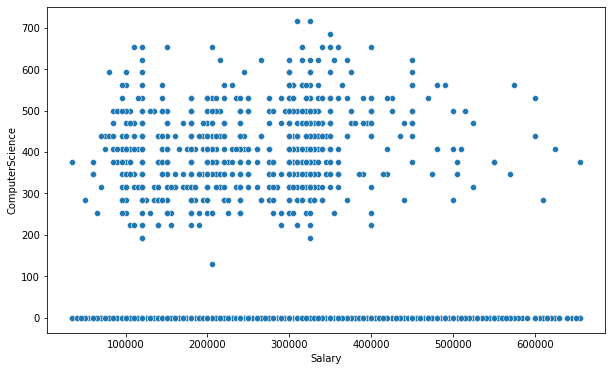

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['ComputerScience'])
plt.show()

<Figure size 720x432 with 0 Axes>

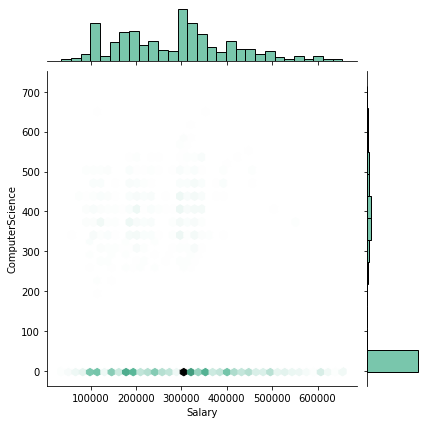

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['ComputerScience'], kind="hex", color="#4CB391")
plt.show()

1. as we can see there is no effect in salary column,i.e we cannot find any relation between there two columns.
2. and mojority of the candidates have scored 0 in this section.

#### 16. MechanicalEngg

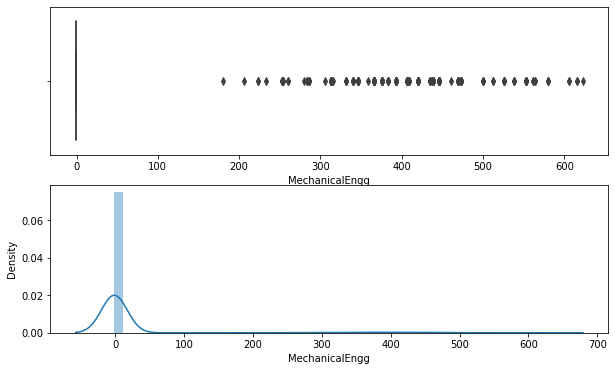

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['MechanicalEngg'])

plt.subplot(2, 1, 2)
sns.distplot(df['MechanicalEngg'])

plt.show()

In [ ]:
q3 = df['MechanicalEngg'].quantile(q=0.75)
q1 = df['MechanicalEngg'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['MechanicalEngg'] > upper_limit,'MechanicalEngg'] = df['MechanicalEngg'].median()
#df.loc[df['MechanicalEngg'] < lower_limit,'MechanicalEngg'] = df['MechanicalEngg'].median()

IQR =  -1.0 - -1.0
upper_limit = -1.0
lower_limit = -1.0


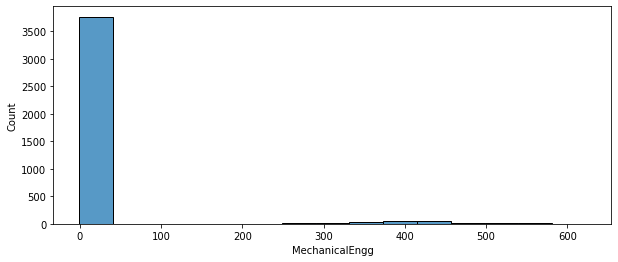

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['MechanicalEngg'], bins=15)
plt.show()

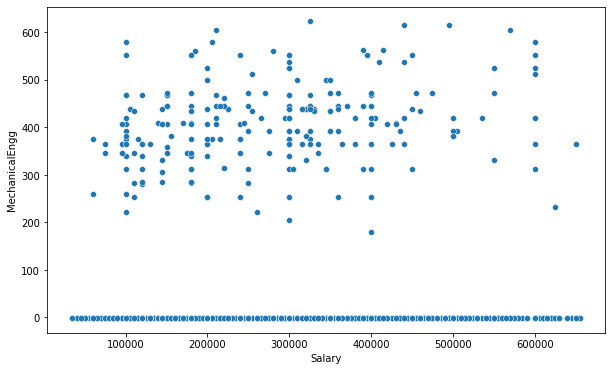

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['MechanicalEngg'])
plt.show()

<Figure size 720x432 with 0 Axes>

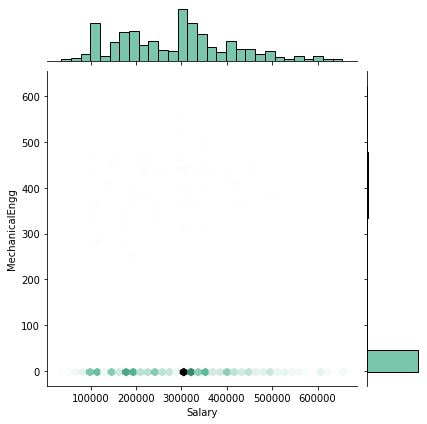

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['MechanicalEngg'], kind="hex", color="#4CB391")
plt.show()

1. as we can see there is no effect in salary column,i.e we cannot find any relation between there two columns.
2. and mojority of the candidates have scored 0 in this section.

#### 17. ElectricalEngg

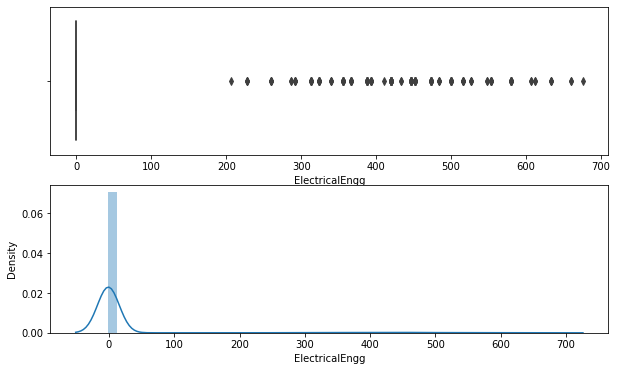

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['ElectricalEngg'])

plt.subplot(2, 1, 2)
sns.distplot(df['ElectricalEngg'])

plt.show()

In [ ]:
q3 = df['ElectricalEngg'].quantile(q=0.75)
q1 = df['ElectricalEngg'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['ElectricalEngg'] > upper_limit,'ElectricalEngg'] = df['ElectricalEngg'].median()
#df.loc[df['ElectricalEngg'] < lower_limit,'ElectricalEngg'] = df['ElectricalEngg'].median()

IQR =  -1.0 - -1.0
upper_limit = -1.0
lower_limit = -1.0


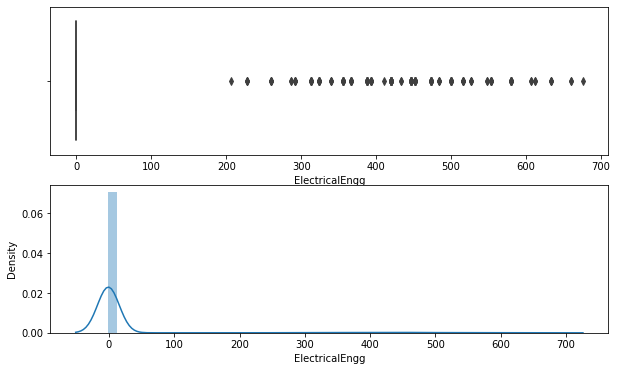

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['ElectricalEngg'])

plt.subplot(2, 1, 2)
sns.distplot(df['ElectricalEngg'])

plt.show()

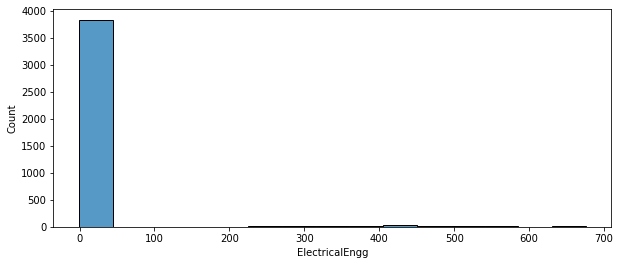

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['ElectricalEngg'], bins=15)
plt.show()

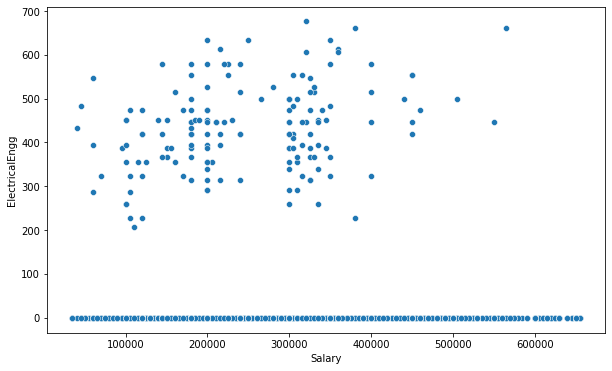

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['ElectricalEngg'])
plt.show()

<Figure size 720x432 with 0 Axes>

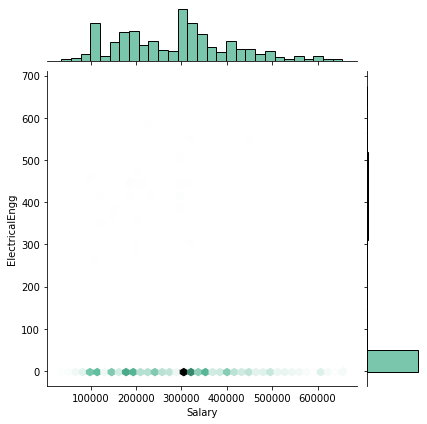

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['ElectricalEngg'], kind="hex", color="#4CB391")
plt.show()

1. as we can see there is no effect in salary column,i.e we cannot find any relation between there two columns.
2. and mojority of the candidates have scored 0 in this section only very few candidates have scored 200 to 700

#### 18. TelecomEngg

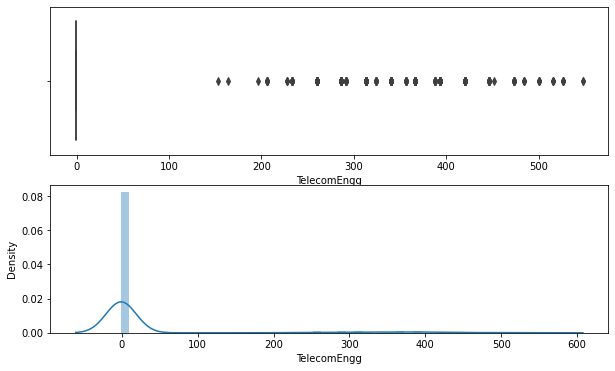

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['TelecomEngg'])

plt.subplot(2, 1, 2)
sns.distplot(df['TelecomEngg'])

plt.show()

In [ ]:
q3 = df['TelecomEngg'].quantile(q=0.75)
q1 = df['TelecomEngg'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['TelecomEngg'] > upper_limit,'TelecomEngg'] = df['TelecomEngg'].median()
#df.loc[df['TelecomEngg'] < lower_limit,'TelecomEngg'] = df['TelecomEngg'].median()

IQR =  -1.0 - -1.0
upper_limit = -1.0
lower_limit = -1.0


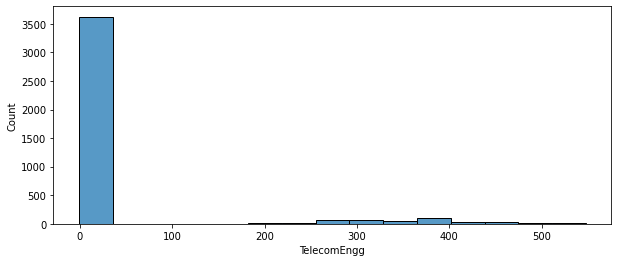

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['TelecomEngg'], bins=15)
plt.show()

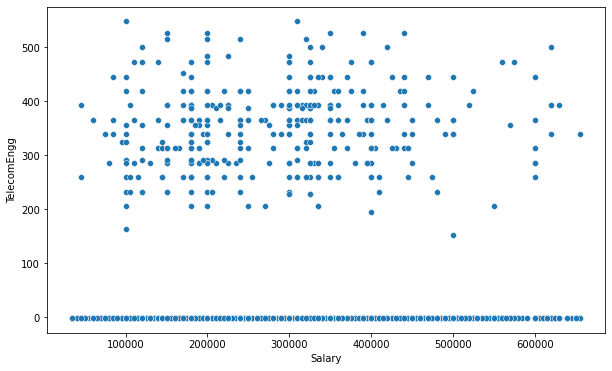

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['TelecomEngg'])
plt.show()

<Figure size 720x432 with 0 Axes>

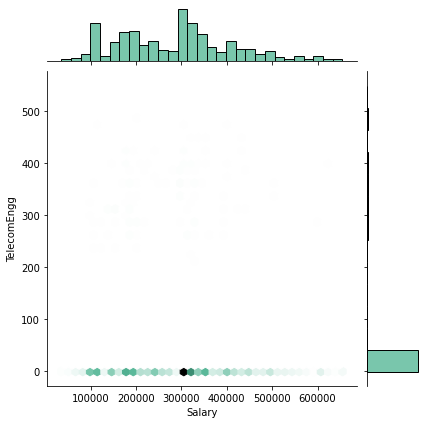

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['TelecomEngg'], kind="hex", color="#4CB391")
plt.show()

1. as we can see there is no effect in salary column,i.e we cannot find any relation between there two columns.
2. and mojority of the candidates have scored 0 in this section.

#### 19. CivilEngg

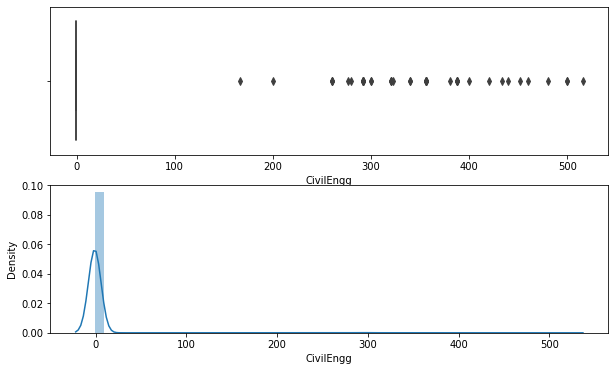

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['CivilEngg'])

plt.subplot(2, 1, 2)
sns.distplot(df['CivilEngg'])

plt.show()

In [ ]:
q3 = df['CivilEngg'].quantile(q=0.75)
q1 = df['CivilEngg'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['CivilEngg'] > upper_limit,'CivilEngg'] = df['CivilEngg'].median()
#df.loc[df['CivilEngg'] < lower_limit,'CivilEngg'] = df['CivilEngg'].median()

IQR =  -1.0 - -1.0
upper_limit = -1.0
lower_limit = -1.0


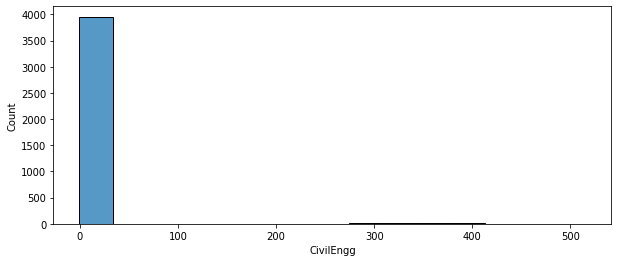

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['CivilEngg'], bins=15)
plt.show()

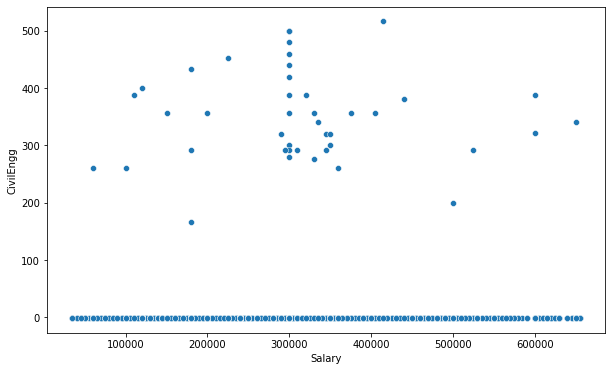

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['CivilEngg'])
plt.show()

<Figure size 720x432 with 0 Axes>

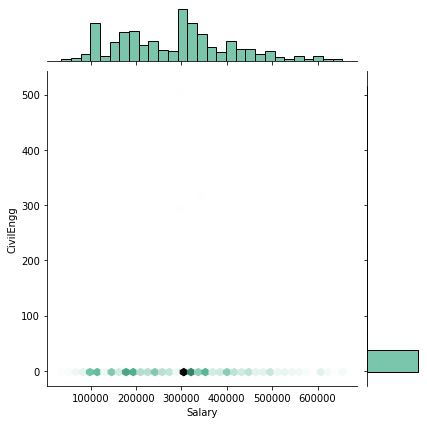

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['CivilEngg'], kind="hex", color="#4CB391")
plt.show()

1. as we can see there is no effect in salary column,i.e we cannot find any relation between there two columns but salary is high for candiates having score 0.
2. and mojority of the candidates have scored 0 in this section.

#### 20. conscientiousness

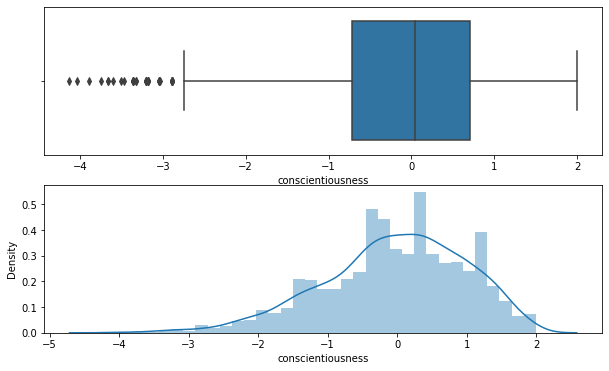

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['conscientiousness'])

plt.subplot(2, 1, 2)
sns.distplot(df['conscientiousness'])

plt.show()

In [ ]:
q3 = df['conscientiousness'].quantile(q=0.75)
q1 = df['conscientiousness'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['conscientiousness'] > upper_limit,'conscientiousness'] = df['conscientiousness'].median()
df.loc[df['conscientiousness'] < lower_limit,'conscientiousness'] = df['conscientiousness'].median()

IQR =  0.7027 - -0.7135250000000001
upper_limit = 2.8270375000000003
lower_limit = -2.8378625000000004


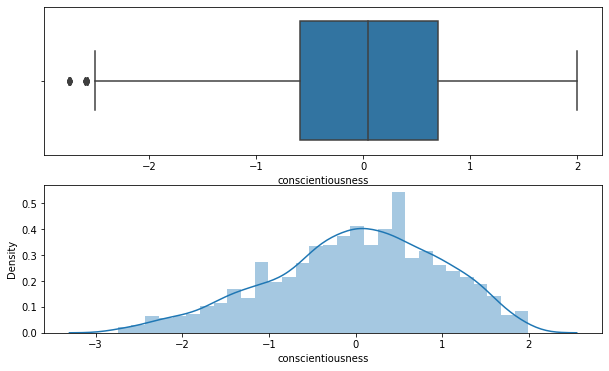

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['conscientiousness'])

plt.subplot(2, 1, 2)
sns.distplot(df['conscientiousness'])

plt.show()

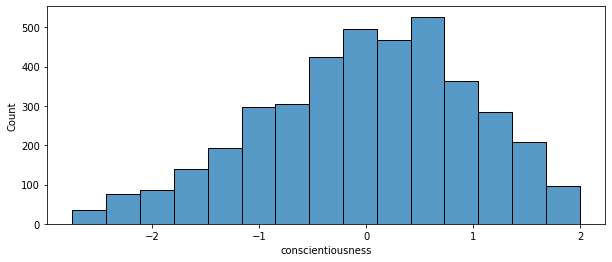

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['conscientiousness'], bins=15)
plt.show()

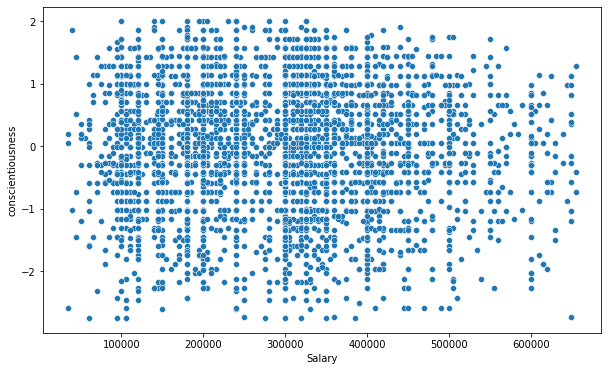

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['conscientiousness'])
plt.show()

<Figure size 720x432 with 0 Axes>

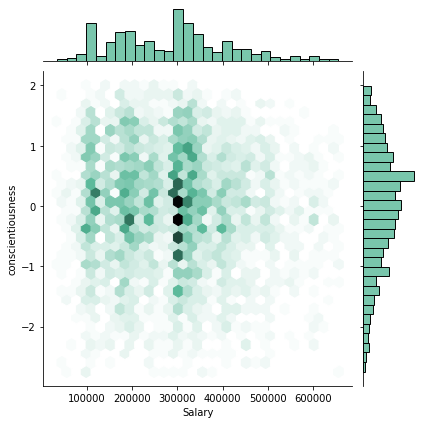

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['conscientiousness'], kind="hex", color="#4CB391")
plt.show()

1. we can see that majority of the candidates have scores ranging from -2 to 2 and these scores didnt have any relationship with the salary column.

#### 21. agreeableness

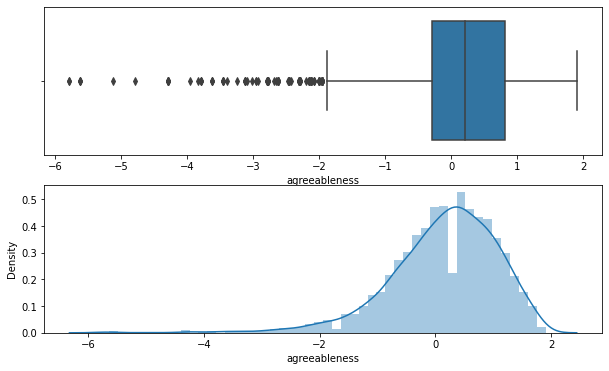

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['agreeableness'])

plt.subplot(2, 1, 2)
sns.distplot(df['agreeableness'])

plt.show()

In [ ]:
q3 = df['agreeableness'].quantile(q=0.75)
q1 = df['agreeableness'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['agreeableness'] > upper_limit,'agreeableness'] = df['agreeableness'].median()
df.loc[df['agreeableness'] < lower_limit,'agreeableness'] = df['agreeableness'].median()

IQR =  0.8128 - -0.2871
upper_limit = 2.46265
lower_limit = -1.93695


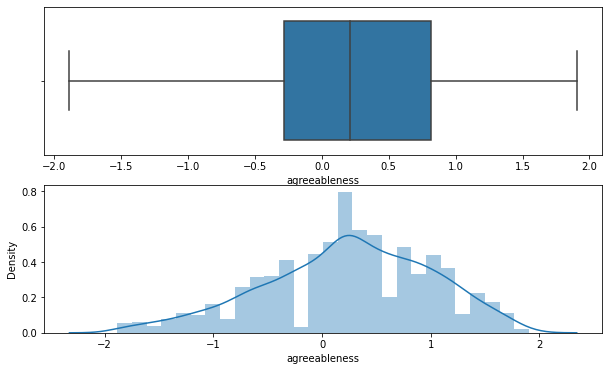

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['agreeableness'])

plt.subplot(2, 1, 2)
sns.distplot(df['agreeableness'])

plt.show()

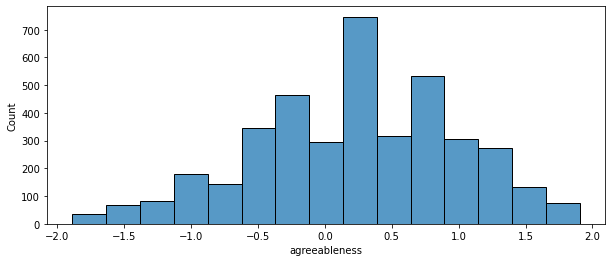

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['agreeableness'], bins=15)
plt.show()

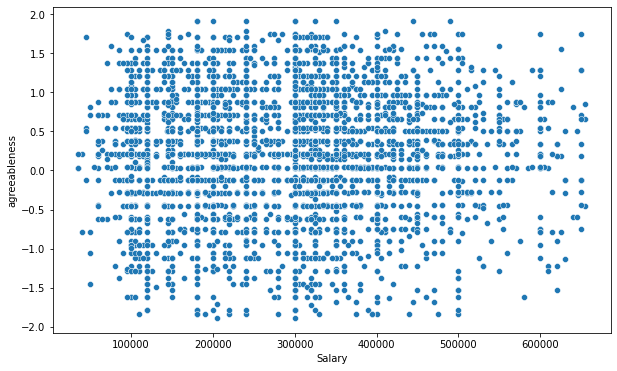

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['agreeableness'])
plt.show()

<Figure size 720x432 with 0 Axes>

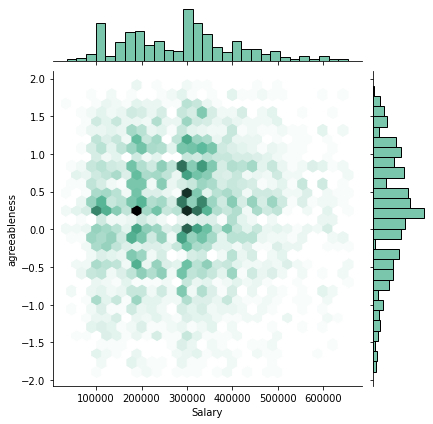

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['agreeableness'], kind="hex", color="#4CB391")
plt.show()

1. there is a slight distribution of salary. and the agreeableness score is not effecting the salary.

#### 22. extraversion

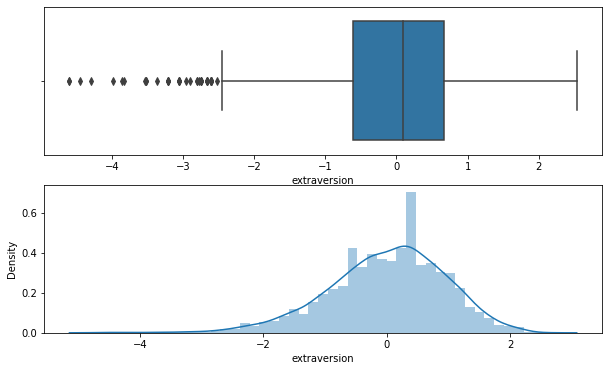

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['extraversion'])

plt.subplot(2, 1, 2)
sns.distplot(df['extraversion'])

plt.show()

In [ ]:
q3 = df['extraversion'].quantile(q=0.75)
q1 = df['extraversion'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['extraversion'] > upper_limit,'extraversion'] = df['extraversion'].median()
df.loc[df['extraversion'] < lower_limit,'extraversion'] = df['extraversion'].median()

IQR =  0.672 - -0.6048
upper_limit = 2.5872
lower_limit = -2.5200000000000005


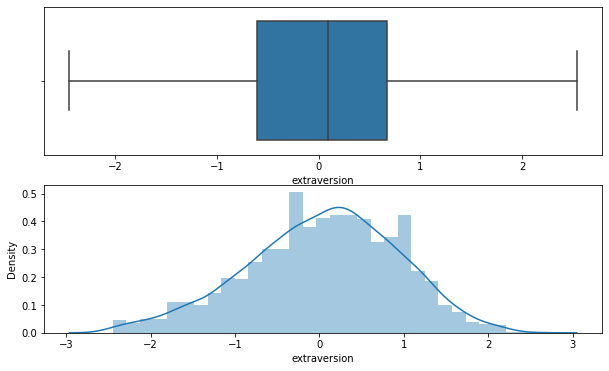

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['extraversion'])

plt.subplot(2, 1, 2)
sns.distplot(df['extraversion'])

plt.show()

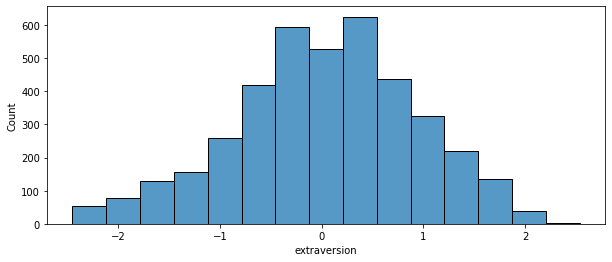

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['extraversion'], bins=15)
plt.show()

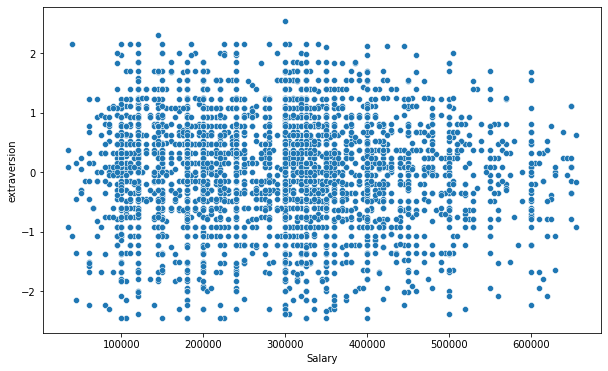

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['extraversion'])
plt.show()

<Figure size 720x432 with 0 Axes>

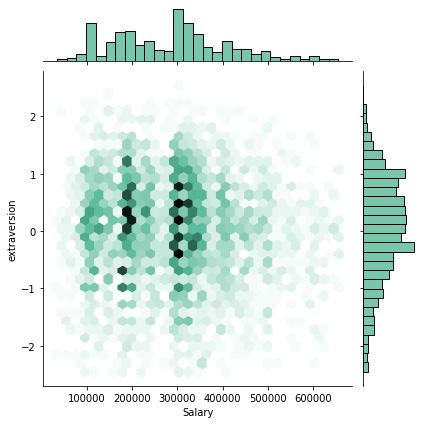

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['extraversion'], kind="hex", color="#4CB391")
plt.show()

- the candiates have scores are between -1 to 1 heavily but the salary is not effected but these column extraversion.

#### 23. nueroticism

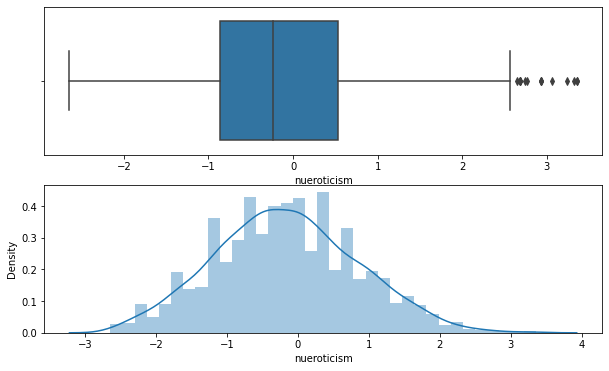

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['nueroticism'])

plt.subplot(2, 1, 2)
sns.distplot(df['nueroticism'])

plt.show()

In [ ]:
q3 = df['nueroticism'].quantile(q=0.75)
q1 = df['nueroticism'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['nueroticism'] > upper_limit,'nueroticism'] = df['nueroticism'].median()
#df.loc[df['nueroticism'] < lower_limit,'nueroticism'] = df['nueroticism'].median()

IQR =  0.5262 - -0.8682
upper_limit = 2.6178
lower_limit = -2.9598


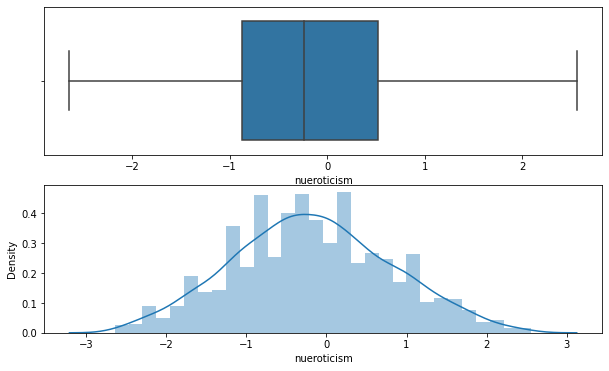

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['nueroticism'])

plt.subplot(2, 1, 2)
sns.distplot(df['nueroticism'])

plt.show()

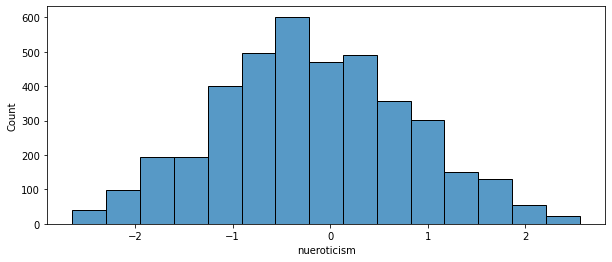

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['nueroticism'], bins=15)
plt.show()

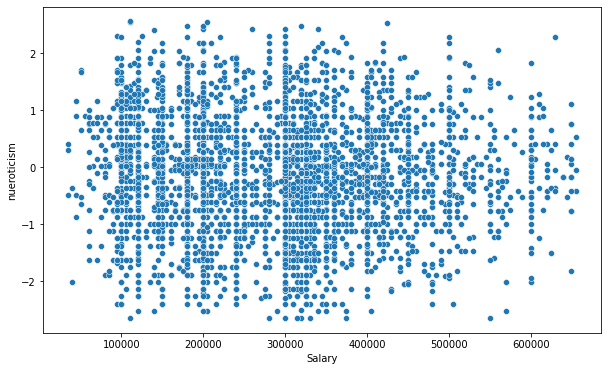

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['nueroticism'])
plt.show()

<Figure size 720x432 with 0 Axes>

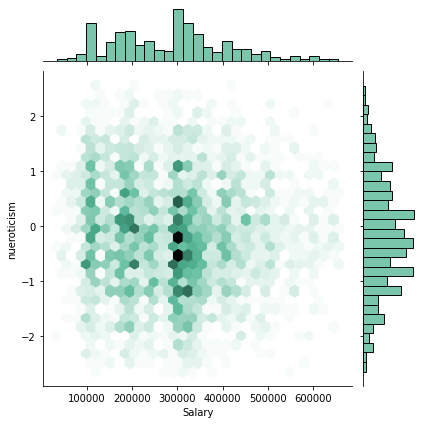

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['nueroticism'], kind="hex", color="#4CB391")
plt.show()

- there so linear relationship between nueroticism and salary, and the data is scattered like a ground having no relationship.
- majority of the candidates have salary of around 3,00,000 and nueroticism score of -1 to 0.5.  

#### 24. openess_to_experience

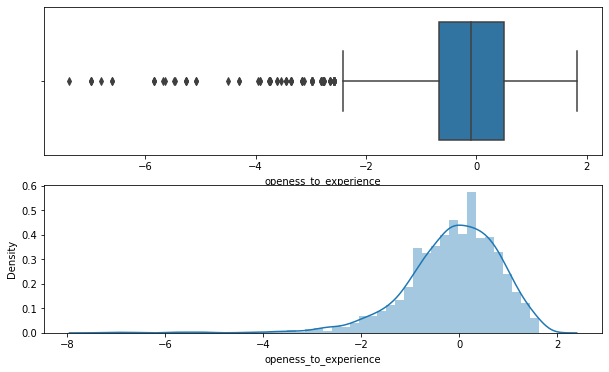

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['openess_to_experience'])

plt.subplot(2, 1, 2)
sns.distplot(df['openess_to_experience'])

plt.show()

In [ ]:
q3 = df['openess_to_experience'].quantile(q=0.75)
q1 = df['openess_to_experience'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['openess_to_experience'] > upper_limit,'openess_to_experience'] = df['openess_to_experience'].median()
df.loc[df['openess_to_experience'] < lower_limit,'openess_to_experience'] = df['openess_to_experience'].median()

IQR =  0.5024 - -0.6692
upper_limit = 2.2598000000000003
lower_limit = -2.4266


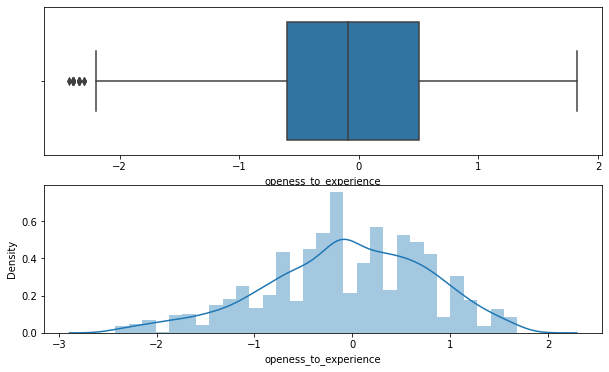

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['openess_to_experience'])

plt.subplot(2, 1, 2)
sns.distplot(df['openess_to_experience'])

plt.show()

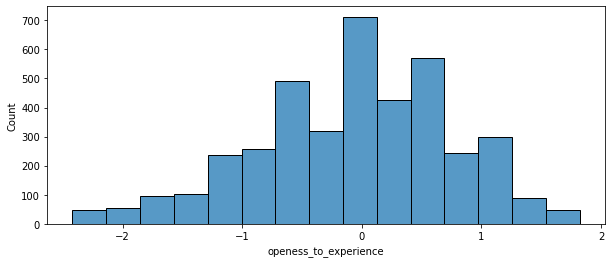

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['openess_to_experience'], bins=15)
plt.show()

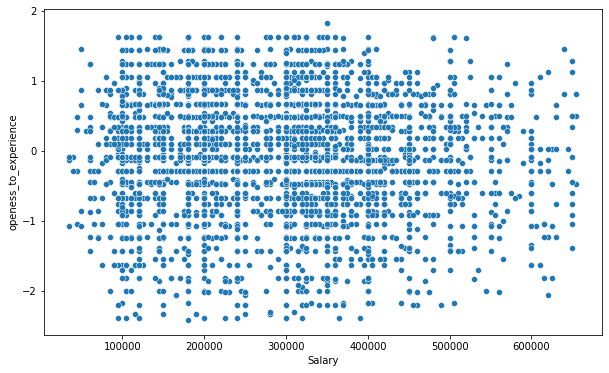

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['openess_to_experience'])
plt.show()

<Figure size 720x432 with 0 Axes>

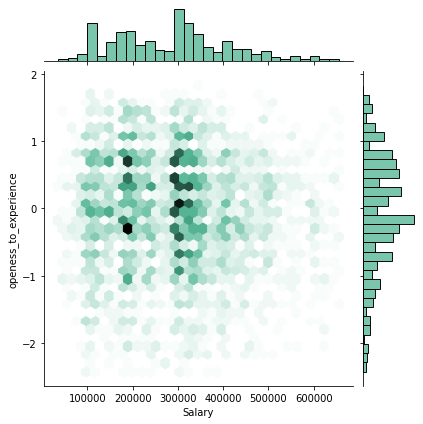

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['openess_to_experience'], kind="hex", color="#4CB391")
plt.show()

- we can see that the majority candidates have salary of 2,00,000 and 3,00,000 have the scores of -.05 to 1 in openess_to_experience section, and there is no linear relationship with salary. 

#### 25. experience

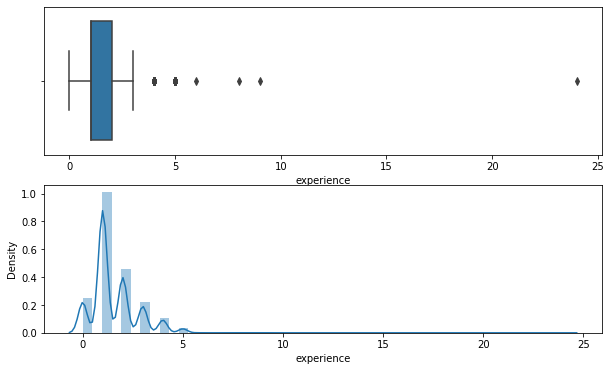

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['experience'])

plt.subplot(2, 1, 2)
sns.distplot(df['experience'])

plt.show()

In [ ]:
q3 = df['experience'].quantile(q=0.75)
q1 = df['experience'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
#df.loc[df['experience'] > upper_limit,'experience'] = df['experience'].median()
#df.loc[df['experience'] < lower_limit,'experience'] = df['experience'].median()

IQR =  2.0 - 1.0
upper_limit = 3.5
lower_limit = -0.5


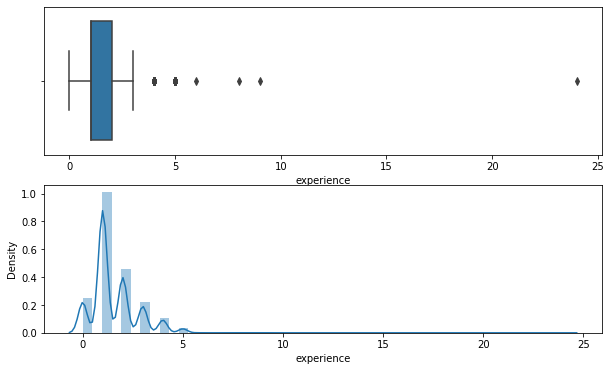

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['experience'])

plt.subplot(2, 1, 2)
sns.distplot(df['experience'])

plt.show()

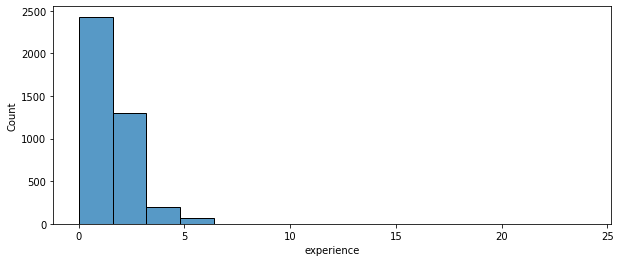

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['experience'], bins=15)
plt.show()

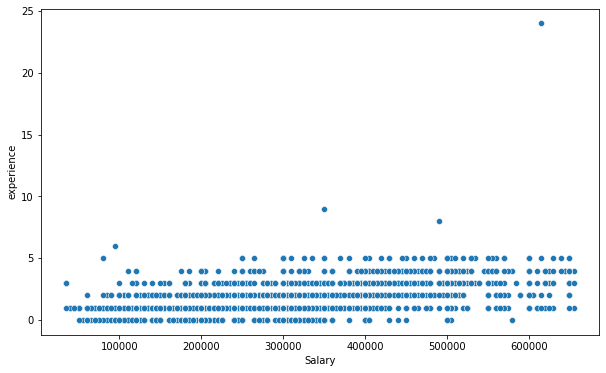

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['experience'])
plt.show()

<Figure size 720x432 with 0 Axes>

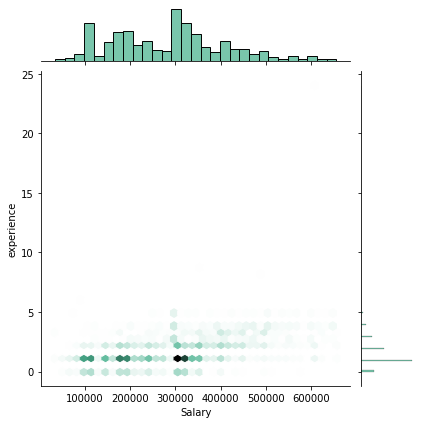

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['experience'], kind="hex", color="#4CB391")
plt.show()

- Experience of most of the candiates is under 5 years and salary of these candidates are vaying between 10,00,00 to 6,00,000.

#### 26. Age

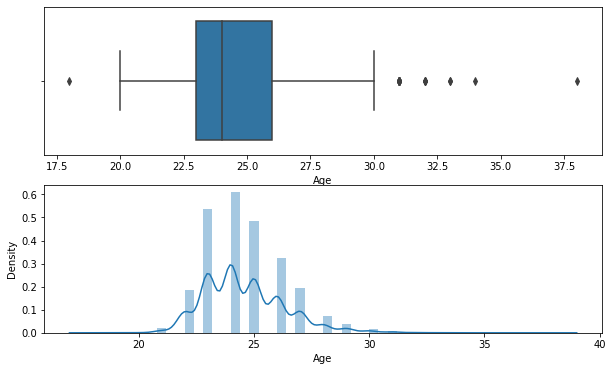

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Age'])

plt.subplot(2, 1, 2)
sns.distplot(df['Age'])

plt.show()

In [ ]:
q3 = df['Age'].quantile(q=0.75)
q1 = df['Age'].quantile(q=0.25)
iqr = q3 - q1
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
print('IQR = ',q3,'-',q1)
print('upper_limit =', upper_limit)
print('lower_limit =', lower_limit)
df.loc[df['Age'] > upper_limit,'Age'] = df['Age'].median()
df.loc[df['Age'] < lower_limit,'Age'] = df['Age'].median()

IQR =  26.0 - 23.0
upper_limit = 30.5
lower_limit = 18.5


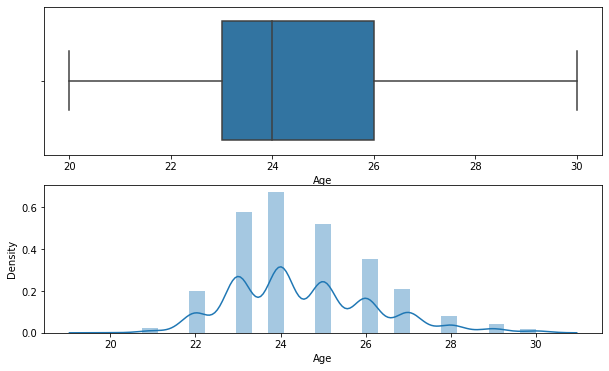

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sns.boxplot(df['Age'])

plt.subplot(2, 1, 2)
sns.distplot(df['Age'])

plt.show()

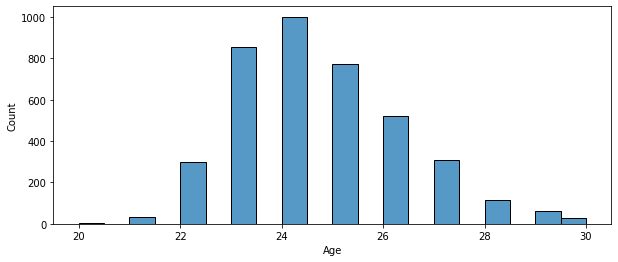

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['Age'], bins=20)
plt.show()

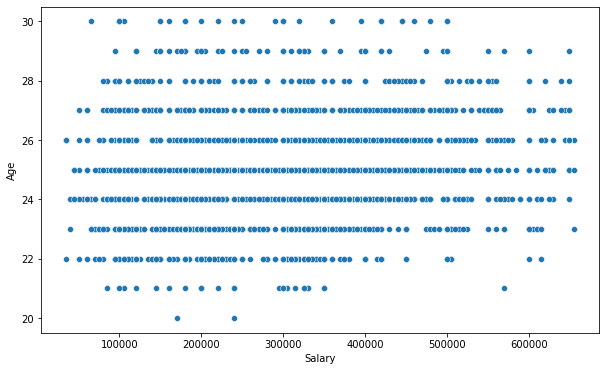

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Salary'], y=df['Age'])
plt.show()

<Figure size 720x432 with 0 Axes>

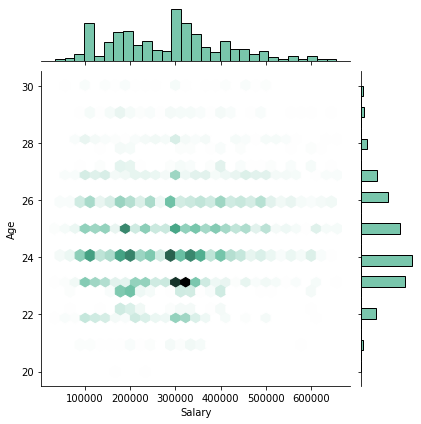

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x=df['Salary'], y=df['Age'], kind="hex", color="#4CB391")
plt.show()

- mojority of the candidates are of age 23 to 26 have written the exam, and very few are of age 22 and above 27. 

## Categorical columns

In [ ]:
df.describe(include='object')

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998
unique,419,339,2,275,340,4,46,26
top,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,539,627,3041,1395,1400,3700,880,915


#### 1. JobCity

In [ ]:
df['JobCity'].value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [ ]:
df['JobCity'].replace(to_replace=-1, value='unknown', inplace=True)
df['JobCity'] = df['JobCity'].apply(lambda x : x.lower())
df['JobCity'] = df['JobCity'].apply(lambda x : x.lstrip())
df['JobCity'] = df['JobCity'].apply(lambda x : x.rstrip())

In [ ]:
df['JobCity'] = df['JobCity'].apply(lambda i:'banglore ' if i=='bangalore ' or i =='-1' or i=='bangalore' or i =='bengaluru' or  i=='asifabadbanglore' or i =='bangalore' else 'hyderabad'  if i=='hyderabad(bhadurpally)' or i =='secunderabad' else 'ambala' if i=='ambala city' else 'saudi' if i =='al jubail,saudi arabia' or i == 'saudi arabia' or i =='jeddah saudi arabia' else  'noida' if i =='a-64,sec-64,noida' or i=='greater noida' or i =='nouda' else 'chennai' if i =='chennai & mumbai' or  i =='chennai, bangalore' else 'mumbai' if i =='navi mumbai' else  'delhi' if i =='delhi/ncr' or i =='new delhi' or i =='new delhi - jaisalmer'  or i =='new delhi 'else 'cochin' if i =='kochi/cochin' else 'panchkula' if  i=='punchkula' else 'trivandrum' if i =='thiruvananthapuram' else 'vizag' if i =='vsakhapttnam' or i =='visakhapatnam' or i == 'visakhapatnam' else 'manipuri' if i =='mainpuri' else i)

In [ ]:
# 1. banglore
df['JobCity'] = df['JobCity'].apply(lambda i:'banglore' if i=='banglore ' or i=='banaglore' or i=='banagalore' else i)
# 2. hyderabad
df['JobCity'] = df['JobCity'].apply(lambda i:'hyderabad' if i=='hyderabad' or i=='navi mumbai , hyderabad' or i=='hderabad' or i=='' else i)
# 3. pune chennai
df['JobCity'] = df['JobCity'].apply(lambda i:'pune' if i=='punr' else 'chennai' if i=='kochi/cochin, chennai and coimbatore' else i)
# 4. delhi trivandrum
df['JobCity'] = df['JobCity'].apply(lambda i:'delhi' if i=='ncr' or i=='new dehli' else 'gurgaon' if i=='gurga' else 'trivandrum' if i=='technopark, trivandrum' else i)
# 5. cochin kolkata and bhubaneshwar
df['JobCity'] = df['JobCity'].apply(lambda i:'cochin' if i=='kochi' else 'kolkata' if i=='kolkata`' else 'bhubaneshwar' if i=='bhubaneswar' or i=='bhubneshwar' else i)

In [ ]:
df.drop(df[(df['JobCity'] == 'jamnagar')].index, inplace=True)

In [ ]:
df['JobCity'].value_counts().tail(20)

jodhpur        5
ranchi         4
madurai        4
nasikcity      4
udaipur        4
panchkula      4
gurgoan        4
meerut         4
aurangabad     3
ludhiana       3
bilaspur       3
nashik         3
rudrapur       3
dubai          3
gandhinagar    3
tirupathi      3
haridwar       3
ambala         3
chandrapur     2
pantnagar      2
Name: JobCity, dtype: int64

In [ ]:
df['JobCity'].unique()

array(['banglore', 'indore', 'chennai', 'gurgaon', 'hyderabad', 'noida',
       'kolkata', 'pune', 'unknown', 'mohali', 'delhi', 'bhubaneshwar',
       'mumbai', 'mangalore', 'mysore', 'jaipur', 'thane', 'trivandrum',
       'panchkula', 'coimbatore', 'lucknow', 'gurgoan', 'vizag', 'nagpur',
       'ahmedabad', 'cochin', 'kanpur', 'raipur', 'bhopal', 'faridabad',
       'jodhpur', 'udaipur', 'haridwar', 'jabalpur', 'aurangabad',
       'dehradun', 'rudrapur', 'ranchi', 'madurai', 'chandigarh',
       'ghaziabad', 'pantnagar', 'tirupathi', 'gandhinagar', 'dubai',
       'nashik', 'ludhiana', 'meerut', 'trichy', 'pondicherry',
       'bilaspur', 'chandrapur', 'patna', 'nasikcity', 'ambala'],
      dtype=object)

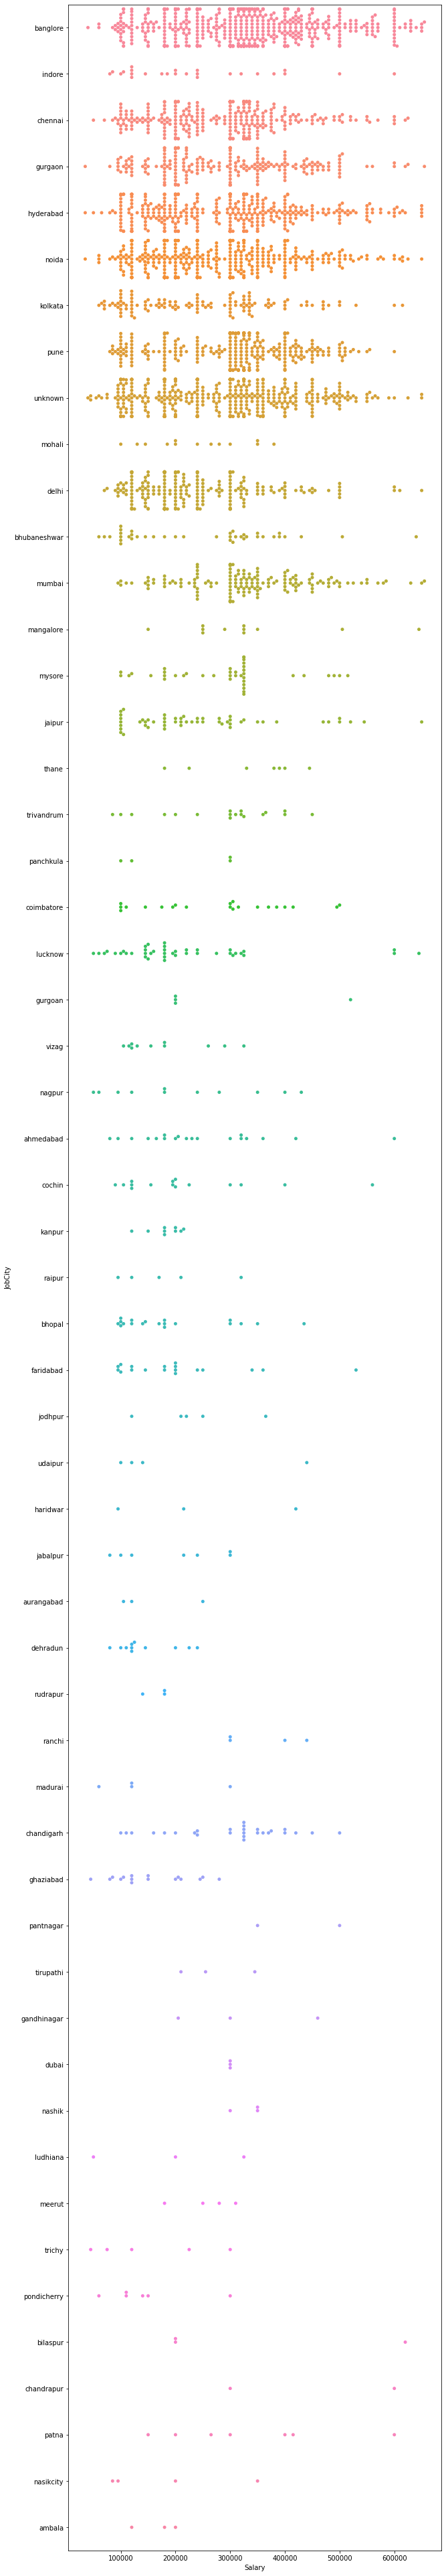

In [ ]:
plt.figure(figsize=(10,70))
sns.swarmplot(y=df['JobCity'], x=df['Salary'])

#### 2. Gender

In [ ]:
df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

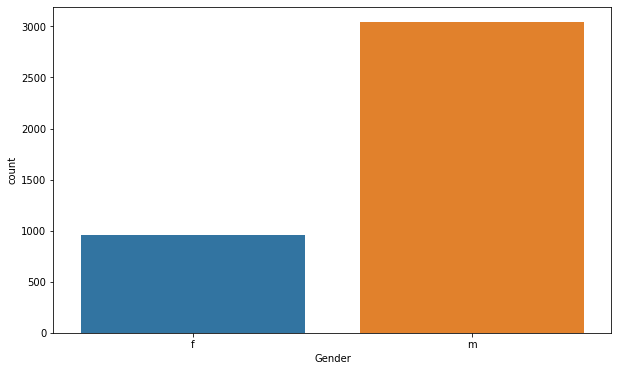

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['Gender'])
plt.show()

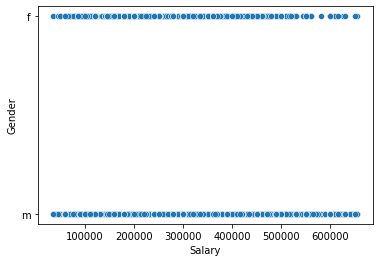

In [ ]:
sns.scatterplot(y=df['Gender'], y=df['Salary'])

#### 3. 10board

In [ ]:
df["10board"].value_counts()

cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [ ]:
df["10board"] = df["10board"].apply(lambda x : "icse" if x=="icse" else("cbse" if x =="cbse" else "ssc"))
df["10board"].value_counts()

ssc     2322
cbse    1395
icse     281
Name: 10board, dtype: int64

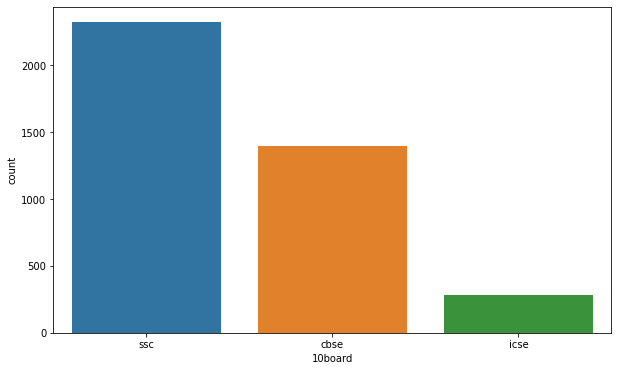

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['10board'])
plt.show()

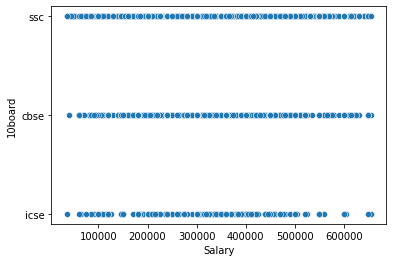

In [ ]:
sns.scatterplot(x=df['Salary'], y=df['10board'])

#### 4. 12board

In [ ]:
df['12board'].value_counts()

cbse                                1400
state board                         1254
0                                    359
icse                                 129
up board                              87
                                    ... 
jawahar higher secondary school        1
nagpur board                           1
bsemp                                  1
board of higher secondary orissa       1
boardofintermediate                    1
Name: 12board, Length: 340, dtype: int64

In [ ]:
df["12board"] = df["12board"].apply(lambda x : "icse" if x=="icse" else("cbse" if x =="cbse" else "ssc"))
df["12board"].value_counts()

ssc     2469
cbse    1400
icse     129
Name: 12board, dtype: int64

#### 5. Degree

In [ ]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

#### 6. Specialization

In [ ]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [ ]:
df['Specialization'] = df['Specialization'].apply(lambda i: 'electronics and communication engineering' if i=='electronics' or i=='instrumentation engineering' or i=='electronics and instrumentation engineering' or i=='control and instrumentation engineering' or i=='applied electronics and instrumentation' or i=='electronics & instrumentation eng' or i=='electronics & telecommunications' or i=='embedded systems technology' or i=='electronics and computer engineering' or i=='telecommunication engineering' or i=='electronics engineering' else 'computer science & engineering' if i=='computer engineering' or i=='computer application' or i=='computer science and technology' or i=='electronics and computer engineering' or i=='computer science' or i=='computer and communication engineering' else 'information technology' if i=='information science engineering' or i=='information science' or i=='information & communication technology' or i=='computer networking' else 'mechanical engineering' if i=='instrumentation and control engineering' or i=='mechanical and automation' or i=='automobile/automotive engineering' or i=='mechatronics'or i=='mechanical & production engineering' or i=='power systems and automation' or i=='internal combustion engine' else 'electrical engineering' if i=='electrical and power engineering' else 'industrial engineering' if i=='industrial & management engineering' or i=='industrial & production engineering' else 'biotechnology' if i=='polymer technology' or i=='ceramic engineering' or i=='biomedical engineering' or i=='chemical engineering' else 'electrical engineering' if i=='electronics and electrical engineering' else 'other' if i=='aeronautical engineering' or i=='metallurgical engineering' else i)

In [ ]:
df['Specialization'].value_counts()

computer science & engineering               1597
electronics and communication engineering    1104
information technology                        691
electrical engineering                        280
mechanical engineering                        238
civil engineering                              29
biotechnology                                  28
other                                          18
industrial engineering                         13
Name: Specialization, dtype: int64

#### 7. GraduationYear

In [ ]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [ ]:
df.drop(df[df['GraduationYear']==0].index,inplace=True,axis=0)
df["GraduationYear"].value_counts() 

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
Name: GraduationYear, dtype: int64

#### 8. CollegeState

In [ ]:
df['CollegeState'].value_counts()

Uttar Pradesh        914
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64